In [2]:
import pandas as pd
import numpy as np
from model_function import Load_Model

import warnings
warnings.filterwarnings("ignore")

X_train_df = pd.DataFrame(Load_Model("X_train"), columns = Load_Model("features"))
X_test_df = pd.DataFrame(Load_Model("X_test"), columns = Load_Model("features"))
X_test = Load_Model("X_test")
y_test = Load_Model("y_test")
#y_test_df = pd.DataFrame(y_test, columns = ['percent_houses_damaged'])
X_train = Load_Model("X_train")
y_train = Load_Model("y_train")
features = Load_Model("features")
model = Load_Model('xgb_model')

In [3]:
y_trainxgb = model.predict(X_train)
y_testxgb = model.predict(X_test)

# clip y_trainxgb and y_testxgb
y_trainxgb = np.clip(y_trainxgb, 0, 100)
y_testxgb = np.clip(y_testxgb, 0, 100)


from model_function import predict2SGGlobal
y_trainxgb2 = predict2SGGlobal(X_train)
y_testxgb2 = predict2SGGlobal(X_test)

y_testxgb_df = pd.DataFrame(y_testxgb)
y_trainxgb_df = pd.DataFrame(y_trainxgb)

y_testxgb

array([0.        , 0.7722644 , 0.12173709, ..., 0.8388178 , 2.3109682 ,
       0.02267693], dtype=float32)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from model_function import eval_bins

In [6]:
from featurelists import shap_list, shap_list_xgb2, lime_list, lime_list_xgb2, check
check

'check_0624_2'

# Linear Regression

In [7]:
# all variables

lr = LinearRegression()
lr.fit(X_train, y_trainxgb)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_testxgb, y_pred)
print("MSE: ", mse)

#RSME
import numpy as np
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

eval_bins(y_testxgb, y_pred, y_test)[0]

MSE:  9.245440713142496
RMSE:  3.0406316306225745
Bin: [0, 9e-05]      RMSE: 1.513, Avg. Error: -0.023
Bin: [9e-05, 1]      RMSE: 2.136, Avg. Error: -1.101
Bin: [1, 10]         RMSE: 3.686, Avg. Error: -0.852
Bin: [10, 50]        RMSE: 13.905, Avg. Error: 7.926
Bin: [50, 100]       RMSE: 29.298, Avg. Error: 23.678
Total RSME 3.0406316306225745
Total Avg. Error -0.005447846095239273


[[0, 9e-05],
 2.2890894190201045,
 1.5129737007033879,
 1.0789821706200469,
 -0.023128380838183655]

In [8]:
from featurelists import shap_list, lime_list, shap_list_xgb2, lime_list_xgb2

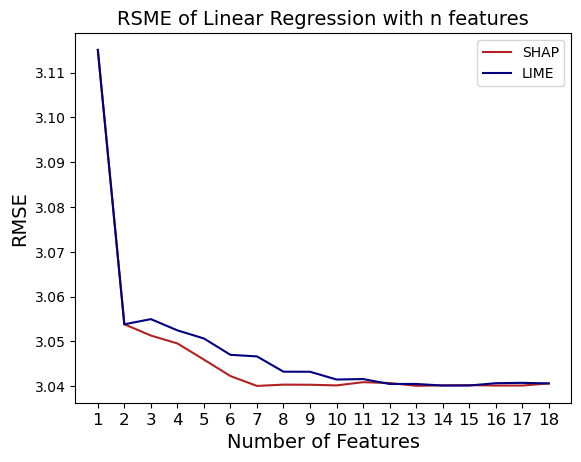

In [9]:
# LIME vs SHAP
rmse_list = []
for n in range(1, len(shap_list)+1):
    lr = LinearRegression()
    lr.fit(X_train_df[shap_list[:n]], y_trainxgb)
    y_pred = lr.predict(X_test_df[shap_list[:n]])
    mse = mean_squared_error(y_testxgb, y_pred)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

rmse_list2 = []
for n in range(1, len(lime_list)+1):
    lr = LinearRegression()
    lr.fit(X_train_df[lime_list[:n]], y_trainxgb)
    y_pred = lr.predict(X_test_df[lime_list[:n]])
    mse = mean_squared_error(y_testxgb, y_pred)
    rmse = np.sqrt(mse)
    rmse_list2.append(rmse)

# plot
import matplotlib.pyplot as plt
plt.plot(rmse_list, color = 'firebrick', label = 'SHAP')
plt.plot(rmse_list2, color = 'navy', label = 'LIME')
plt.xlabel('Number of Features', fontsize = 14)
plt.xticks(range(len(shap_list)), list(range(1,19)), fontsize = 12)
plt.ylabel('RMSE', fontsize = 14)
plt.title('RSME of Linear Regression with n features', fontsize = 14)
plt.legend()
plt.show()

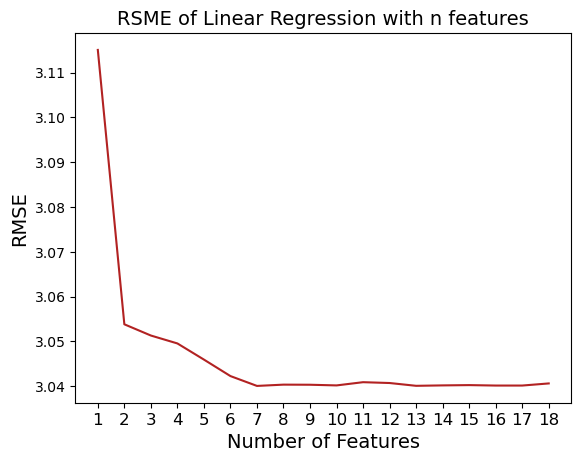

In [26]:
# plot
import matplotlib.pyplot as plt

rmse_list = []
for n in range(1, len(shap_list)+1):
    lr = LinearRegression()
    lr.fit(X_train_df[shap_list[:n]], y_trainxgb)
    y_pred = lr.predict(X_test_df[shap_list[:n]])
    mse = mean_squared_error(y_testxgb, y_pred)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)


plt.plot(rmse_list, color = 'firebrick', label = 'SHAP')
#plt.plot(rmse_list2, color = 'navy', label = 'LIME')
plt.xlabel('Number of Features', fontsize = 14)
plt.xticks(range(len(shap_list)), list(range(1,19)), fontsize = 12)
plt.ylabel('RMSE', fontsize = 14)
plt.title('RSME of Linear Regression with n features', fontsize = 14)
#plt.legend()
plt.show()

In [27]:
# only use best n variables
n = 7
lr = LinearRegression()
lr.fit(X_train_df[shap_list[:n]], y_trainxgb)
y_pred = lr.predict(X_test_df[shap_list[:n]])

mse = mean_squared_error(y_testxgb, y_pred)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

eval_bins(y_testxgb, y_pred, y_test)[0]

# print out the coefficients as formula
i = lr.intercept_
c = lr.coef_
print(round(i,2), end = ' + ')
for j in range(n):
    if j == round(n/2):
        print()
    print(f"{c[j]:.2f} * {shap_list[j]} ", end = '+ ')

MSE:  9.242020728214865
RMSE:  3.040069197931992
Bin: [0, 9e-05]      RMSE: 1.512, Avg. Error: -0.019
Bin: [9e-05, 1]      RMSE: 2.142, Avg. Error: -1.107
Bin: [1, 10]         RMSE: 3.683, Avg. Error: -0.833
Bin: [10, 50]        RMSE: 13.903, Avg. Error: 7.949
Bin: [50, 100]       RMSE: 29.279, Avg. Error: 23.661
Total RSME 3.040069197931992
Total Avg. Error -0.0014796787590211629
0.84 + 2.78 * wind_speed + 0.92 * track_distance + 0.55 * rainfall_max_6h + 0.09 * percent_houses_damaged_5years + 
-0.48 * rainfall_max_24h + 0.08 * coast_length + -0.09 * mean_elev + 

## include powers of wind_speed

In [11]:
# only use best n variables
n = 7
pwr = 4
lr_Xtrain = X_train_df[shap_list[:n]]
lr_Xtrain["ws_2"] = lr_Xtrain["wind_speed"]**pwr
lr_Xtest = X_test_df[shap_list[:n]]
lr_Xtest["ws_2"] = lr_Xtest["wind_speed"]**pwr

lr = LinearRegression()
lr.fit(lr_Xtrain, y_trainxgb)
y_pred = lr.predict(lr_Xtest)

mse = mean_squared_error(y_testxgb, y_pred)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

eval_bins(y_testxgb, y_pred, y_test)[0]


MSE:  1.5467344123855542
RMSE:  1.2436777767515002
Bin: [0, 9e-05]      RMSE: 0.492, Avg. Error: 0.001
Bin: [9e-05, 1]      RMSE: 0.938, Avg. Error: -0.121
Bin: [1, 10]         RMSE: 2.685, Avg. Error: -0.405
Bin: [10, 50]        RMSE: 5.856, Avg. Error: 0.901
Bin: [50, 100]       RMSE: 8.733, Avg. Error: 4.595
Total RSME 1.2436777767515002
Total Avg. Error -0.0077799645805674885


[[0, 9e-05],
 0.2423304355489603,
 0.49227069336794804,
 0.22711059349645493,
 0.000526884170365689]

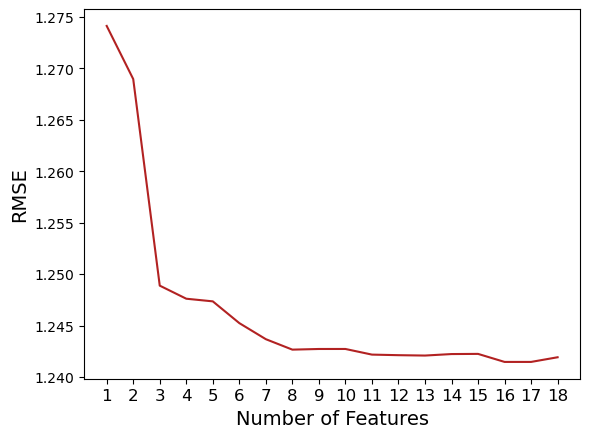

In [29]:
pwr = 4

rmse_list = []
for n in range(1, 19):
    # print("n: ", n) 
    lr_Xtrain = X_train_df[shap_list[:n]]
    lr_Xtrain["ws_2"] = lr_Xtrain["wind_speed"]**pwr
    lr_Xtest = X_test_df[shap_list[:n]]
    lr_Xtest["ws_2"] = lr_Xtest["wind_speed"]**pwr

    lr = LinearRegression()
    lr.fit(lr_Xtrain, y_trainxgb)
    y_pred = lr.predict(lr_Xtest)

    mse = mean_squared_error(y_testxgb, y_pred)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    # eval_bins(y_testxgb, y_pred, y_test)[0]


# plot
import matplotlib.pyplot as plt
plt.plot(rmse_list, color = 'firebrick', label = 'SHAP')
plt.xlabel('Number of Features', fontsize = 14)
plt.xticks(range(len(shap_list)), list(range(1,19)), fontsize = 12)
plt.ylabel('RMSE', fontsize = 14)
#plt.title('RSME of Linear Regression with n features + wind_speed^4', fontsize = 14)
#plt.legend()
plt.show()




Text(0.5, 1.0, 'Linear Regression with n features + power of wind_speed')

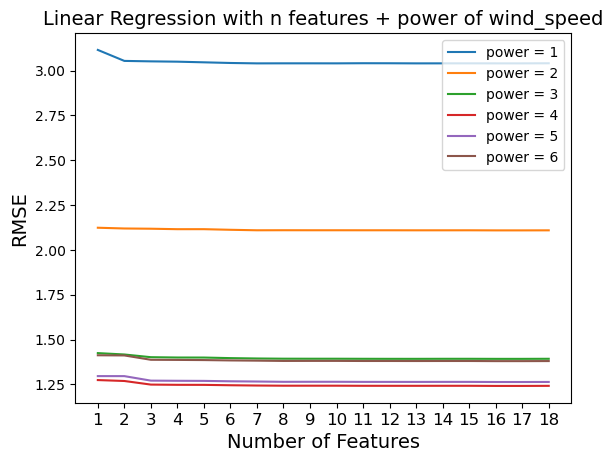

In [13]:
# only use best n variables

def pwr_rmse(pwr):
    rmse_list = []
    for n in range(1, 19):
        # print("n: ", n) 
        lr_Xtrain = X_train_df[shap_list[:n]]
        lr_Xtrain["ws_2"] = lr_Xtrain["wind_speed"]**pwr
        lr_Xtest = X_test_df[shap_list[:n]]
        lr_Xtest["ws_2"] = lr_Xtest["wind_speed"]**pwr

        lr = LinearRegression()
        lr.fit(lr_Xtrain, y_trainxgb)
        y_pred = lr.predict(lr_Xtest)

        mse = mean_squared_error(y_testxgb, y_pred)
        rmse = np.sqrt(mse)
        rmse_list.append(rmse)
    return rmse_list

# plt.plot(pwr_rmse(4), label = f"power = 4")
plt.xticks(range(len(shap_list)), list(range(1,19)), fontsize = 12)

# plot for different power
pwr_list = [1,2,3,4,5,6]	
rmse_list = []
for pwr in pwr_list:
    plt.plot(pwr_rmse(pwr), label = f"power = {pwr}")
plt.xticks(range(len(shap_list)), list(range(1,19)), fontsize = 12)
plt.xlabel('Number of Features', fontsize = 14)
plt.legend(loc = 'upper right')
plt.ylabel('RMSE', fontsize = 14)
plt.title('Linear Regression with n features + power of wind_speed', fontsize = 14)

In [14]:
# only use best n variables
n = 3
pwr = 4

lr = LinearRegression()

lr_Xtrain = X_train_df[shap_list[:n]]
lr_Xtrain["ws_2"] = lr_Xtrain["wind_speed"]**pwr
lr_Xtest = X_test_df[shap_list[:n]]
lr_Xtest["ws_2"] = lr_Xtest["wind_speed"]**pwr

lr = LinearRegression()
lr.fit(lr_Xtrain, y_trainxgb)
y_pred = lr.predict(lr_Xtest)

mse = mean_squared_error(y_testxgb, y_pred)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

eval_bins(y_testxgb, y_pred, y_test)[0]

# print out the coefficients as formula
i = lr.intercept_
c = lr.coef_
print(round(i,2), end = '\n')
for j in range(n+1):
    if j == n:
        print(f"{c[j]:.2f} * wind_speed^{pwr}", end = '\n')
    else:
        print(f"{c[j]:.2f} * {shap_list[j]}", end = '\n')

MSE:  1.5597043967927005
RMSE:  1.24888125808369
Bin: [0, 9e-05]      RMSE: 0.486, Avg. Error: 0.009
Bin: [9e-05, 1]      RMSE: 0.956, Avg. Error: -0.156
Bin: [1, 10]         RMSE: 2.703, Avg. Error: -0.405
Bin: [10, 50]        RMSE: 5.889, Avg. Error: 0.928
Bin: [50, 100]       RMSE: 8.748, Avg. Error: 4.612
Total RSME 1.24888125808369
Total Avg. Error -0.005955047914131261
0.03
-0.13 * wind_speed
-0.12 * track_distance
0.23 * rainfall_max_6h
0.19 * wind_speed^4


## Two-Stage Model

In [15]:
lr = LinearRegression()
lr.fit(X_train_df[shap_list[:]], y_trainxgb2)
y_pred = lr.predict(X_test_df[shap_list[:]])
mse = mean_squared_error(y_testxgb2, y_pred)
eval_bins(y_testxgb2, y_pred, y_test)

Bin: [0, 9e-05]      RMSE: 1.716, Avg. Error: -0.066
Bin: [9e-05, 1]      RMSE: 2.555, Avg. Error: -1.302
Bin: [1, 10]         RMSE: 4.582, Avg. Error: -0.588
Bin: [10, 50]        RMSE: 14.447, Avg. Error: 9.513
Bin: [50, 100]       RMSE: 28.737, Avg. Error: 23.343
Total RSME 3.258140880979051
Total Avg. Error -0.02615790606333949


[[[0, 9e-05],
  2.9456714326778375,
  1.7162958464897122,
  1.2186824841646124,
  -0.06600950303193828],
 [[9e-05, 1],
  6.528968254867185,
  2.5551845833260627,
  2.0407490044025223,
  -1.301852160855196],
 [[1, 10],
  20.993746200926026,
  4.581893298727724,
  3.40166774657309,
  -0.5880029903356763],
 [[10, 50],
  208.7228362062535,
  14.447243204371327,
  10.5356171914523,
  9.513342534633864],
 [[50, 100],
  825.8408728758233,
  28.737447222671385,
  23.690131343373398,
  23.343098043916847]]

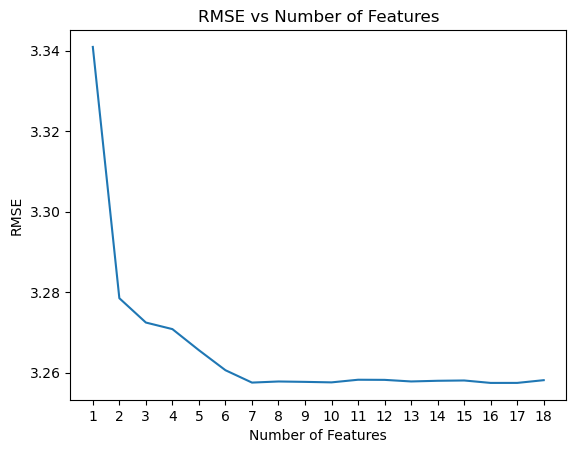

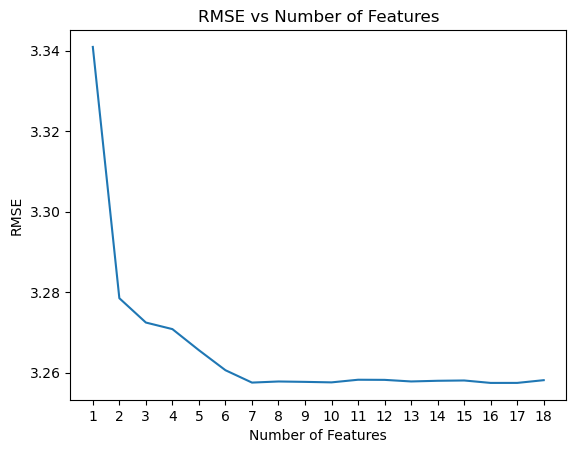

In [16]:
# RSME for all possible n
rmse_list2= []
for n in range(1, len(shap_list)+1):
    lr = LinearRegression()
    lr.fit(X_train_df[shap_list[:n]], y_trainxgb2)
    y_pred = lr.predict(X_test_df[shap_list[:n]])
    mse = mean_squared_error(y_testxgb2, y_pred)
    rmse = np.sqrt(mse)
    rmse_list2.append(rmse)

# plot
import matplotlib.pyplot as plt
plt.plot(rmse_list2, label = 'Two-Stage Model')
plt.plot(rmse_list, label = 'Simple XGB')
plt.xlabel('Number of Features')
plt.xticks(range(len(shap_list)), list(range(1,19)))
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Features')
plt.show()

import matplotlib.pyplot as plt
plt.plot(rmse_list2)
plt.xlabel('Number of Features')
plt.xticks(range(len(shap_list)), list(range(1,19)))
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Features')
plt.show()


## GLM

In [17]:
train_df = Load_Model("X_train")
train_df["xgb_pred"] = np.array(y_trainxgb)
train_df

wind_speed  track_distance  total_houses  rainfall_max_6h  \
0       -0.856555        1.171554      1.135117        -0.622338   
1       -0.721854        1.615811     -0.266746        -0.775814   
2       -0.707059        1.334032     -0.251563        -1.082427   
3        2.279204       -1.611215      2.719272         0.107935   
4       -0.640732       -0.426439      0.013277        -0.354515   
...           ...             ...           ...              ...   
39798    2.663132       -1.609933     -0.209554         0.479312   
39799    1.424884       -0.833592     -0.168857        -0.244553   
39800   -0.404339        0.609623     -0.270483        -0.972802   
39801   -0.441242        1.275424     -0.175807        -0.580512   
39802   -0.456382       -1.730593     -0.231711        -0.058358   

       rainfall_max_24h       rwi  mean_slope  std_slope  mean_tri   std_tri  \
0             -0.614954  1.812785   -1.253141  -1.761114 -1.230703 -1.630404   
1             -0.955256  0.092268   -0.511528  -0.355795 -0.415348 -0.231075   
2             -1.104843  0.184509   -0.841787  -1.132003 -0.812952 -1.061138   
3              0.628674  3.700699   -0.886581   0.055877 -0.924670  0.161881   
4             -0.217106  0.445665   -0.101521   0.727710 -0.090182  0.772969   
...                 ...       ...         ...        ...       ...       ...   
39798          0.817730 -1.200221    0.179528   0.368906  0.206790  0.261839   
39799          0.146413  0.211687   -1.088423  -1.271972 -1.126675 -1.271957   
39800         -0.959236 -0.642774    0.462960   1.558501  0.522721  1.727882   
39801         -0.327223 -1.067426   -1.031316  -1.171678 -1.053768 -1.151963   
39802          0.527346  0.837399    1.183045   1.362528  1.084944  1.380097   

       mean_elev  coast_length  with_coast     urban     rural     water  \
0      -0.736261      1.419780    0.935205  2.616238 -0.995806 -0.532048   
1      -0.667434      1.360675    0.935205 -0.731012 -1.348081  1.783850   
2      -0.695688      0.269003    0.935205 -0.731012 -1.429376  1.865587   
3      -0.583968      0.649223    0.935205  1.872405 -1.293885  0.203590   
4      -0.011754     -0.657215   -1.069284 -0.266117  0.928162 -0.777261   
...          ...           ...         ...       ...       ...       ...   
39798  -0.186781     -0.657215   -1.069284 -0.591544  1.117849 -0.777261   
39799  -0.704177      0.546400    0.935205 -0.033669 -1.348081  1.375162   
39800  -0.338993     -0.046705    0.935205 -0.731012 -1.050002  1.484145   
39801  -0.650142     -0.389708    0.935205 -0.731012  1.199144 -0.777261   
39802  -0.103491      0.744351    0.935205 -0.684523 -0.291254  0.694016   

       total_pop  percent_houses_damaged_5years  xgb_pred  
0       0.976106                      -0.240661  0.004505  
1      -0.273998                      -0.241398  0.065325  
2      -0.262936                      -0.241398  0.045594  
3       2.745908                      -0.128161  3.013477  
4      -0.147534                      -0.241248  0.000000  
...          ...                            ...       ...  
39798  -0.220732                      -0.088301  6.100111  
39799  -0.146397                      -0.145803  1.261724  
39800  -0.279054                       0.142771  0.018704  
39801  -0.183397                      -0.173143  0.000000  
39802  -0.244261                      -0.233513  0.000000  

[39803 rows x 19 columns]

In [18]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# all features
formula = ' + '.join(shap_list)

glm1 = smf.glm(formula = "xgb_pred ~ "+formula, 
                data = train_df, 
                family = sm.families.Poisson())

# Fit the model
result = glm1.fit()
# Display results
print(result.summary())
predictions = result.predict(X_test)

mse = mean_squared_error(y_testxgb, predictions)
print("RMSE: ", np.sqrt(mse))
eval_bins(y_testxgb, predictions, y_test)[0]

                 Generalized Linear Model Regression Results                  
Dep. Variable:               xgb_pred   No. Observations:                39803
Model:                            GLM   Df Residuals:                    39785
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19719.
Date:                Mon, 24 Jun 2024   Deviance:                       10514.
Time:                        03:08:33   Pearson chi2:                 1.96e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9712
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

[[0, 9e-05],
 0.14897029551273777,
 0.38596670259588167,
 0.11348065853375255,
 -0.011660043192191874]

Text(0.5, 1.0, 'RMSE vs Number of Features')

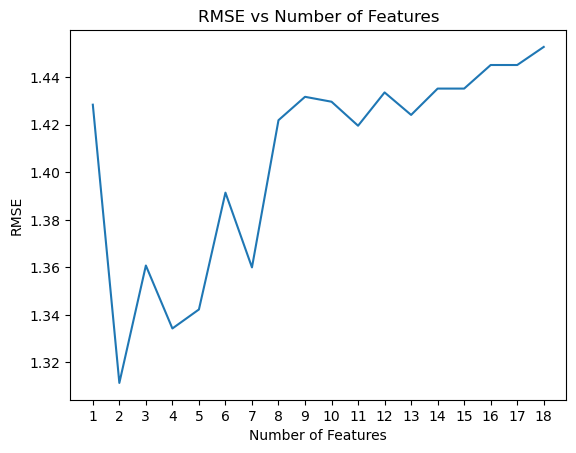

In [19]:
# GLM with different number of features
rmse_list = []
for n in range(1, len(shap_list)+1):
    formula = ' + '.join(shap_list[:n])
    GLM_model = smf.glm(formula = "xgb_pred ~ "+formula, 
                data = train_df, 
                family = sm.families.Poisson())
    # Fit the model
    result = GLM_model.fit()

    predictions = result.predict(X_test)
    mse = mean_squared_error(y_testxgb, predictions)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

#plot
import matplotlib.pyplot as plt
plt.plot(rmse_list)
plt.xlabel('Number of Features')
plt.xticks(range(len(shap_list)), list(range(1,19)))
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Features')

In [20]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

formula = ' + '.join(shap_list)

# 2 best features
model = smf.glm(formula = "xgb_pred ~ wind_speed + track_distance",# + rainfall_max_6h",  #~
                data = train_df, 
                family = sm.families.Poisson())

# Fit the model
result = model.fit()
print(result.summary())
predictions = result.predict(X_test)

mse = mean_squared_error(y_testxgb, predictions)
print("RMSE: ", np.sqrt(mse))
eval_bins(y_testxgb, predictions, y_test)[0]

                 Generalized Linear Model Regression Results                  
Dep. Variable:               xgb_pred   No. Observations:                39803
Model:                            GLM   Df Residuals:                    39800
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21189.
Date:                Mon, 24 Jun 2024   Deviance:                       13454.
Time:                        03:08:36   Pearson chi2:                 3.27e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9690
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.4381      0.020   -123.

[[0, 9e-05],
 0.20188109381664127,
 0.4493118002196707,
 0.13585357018565783,
 -0.016278203829497646]

In [21]:
# add wind_speed^4

import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.glm(formula = "xgb_pred ~  wind_speed + I(wind_speed**4)+  track_distance",# + rainfall_max_6h"
                data = train_df, 
                family = sm.families.Poisson())

# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())
# Estimated default probabilities
predictions = result.predict(X_test)

eval_bins(y_testxgb, predictions, y_test)[0]

                 Generalized Linear Model Regression Results                  
Dep. Variable:               xgb_pred   No. Observations:                39803
Model:                            GLM   Df Residuals:                    39799
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21185.
Date:                Mon, 24 Jun 2024   Deviance:                       13445.
Time:                        03:08:36   Pearson chi2:                 3.21e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9690
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.4244      0

[[0, 9e-05],
 0.19877648734851383,
 0.44584356824845395,
 0.13592088684150178,
 -0.017336839283598485]

Text(0.5, 1.0, 'RMSE vs Number of Features')

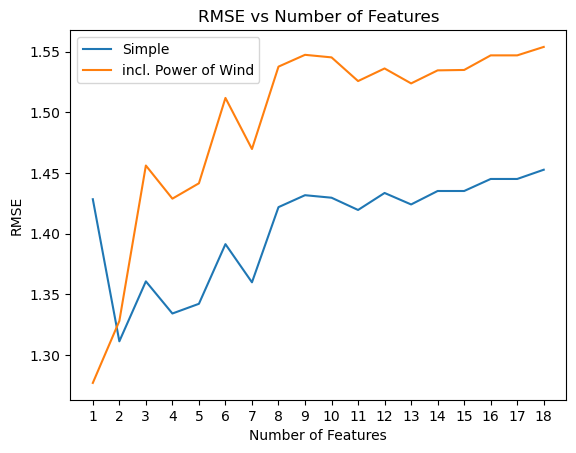

In [22]:
# GLM with different number of features
rmse_list_simple = []
rmse_list_pwr = []

for n in range(1, len(shap_list)+1):

    formula = ' + '.join(shap_list[:n])
    GLM_model = smf.glm(formula = "xgb_pred ~ "+formula, 
                data = train_df, 
                family = sm.families.Poisson())
    # Fit the model
    result = GLM_model.fit()
    # Display and interpret results
    #print(result.summary())
    # Estimated default probabilities
    predictions = result.predict(X_test)
    mse = mean_squared_error(y_testxgb, predictions)
    rmse = np.sqrt(mse)
    rmse_list_simple.append(rmse)

    formula = formula + ' + I(wind_speed**4)'
    GLM_model = smf.glm(formula = "xgb_pred ~ "+formula, 
                data = train_df, 
                family = sm.families.Poisson())
    # Fit the model
    result = GLM_model.fit()
    # Display and interpret results
    #print(result.summary())
    # Estimated default probabilities
    predictions = result.predict(X_test)
    mse = mean_squared_error(y_testxgb, predictions)
    rmse = np.sqrt(mse)
    rmse_list_pwr.append(rmse)


#plot
import matplotlib.pyplot as plt
plt.plot(rmse_list_simple, label = 'Simple')
plt.plot(rmse_list_pwr, label = 'incl. Power of Wind')
plt.legend()
plt.xlabel('Number of Features')
plt.xticks(range(len(shap_list)), list(range(1,19)))
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Features')

In [23]:
# only wind_speed and wind_speed^4

import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.glm(formula = "xgb_pred ~  wind_speed + I(wind_speed**4)",# + rainfall_max_6h"
                data = train_df, 
                family = sm.families.Poisson())

# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())
# Estimated default probabilities
predictions = result.predict(X_test)

eval_bins(y_testxgb, predictions, y_test)[0]

                 Generalized Linear Model Regression Results                  
Dep. Variable:               xgb_pred   No. Observations:                39803
Model:                            GLM   Df Residuals:                    39800
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21793.
Date:                Mon, 24 Jun 2024   Deviance:                       14662.
Time:                        03:08:41   Pearson chi2:                 3.50e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9680
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.1558      0

[[0, 9e-05],
 0.19891553207336915,
 0.4459994754182668,
 0.1442804534096867,
 -0.01819054677877937]

# Decision Tree

In [31]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_trainxgb)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_testxgb, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

MSE:  0.9789283868906304
RMSE:  0.9894080992647223


In [32]:
# include power of wind_speed

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)

# add wind_speed^4
dt_Xtrain = X_train_df.copy()#[shap_list[:n]]
dt_Xtrain["ws_2"] = dt_Xtrain["wind_speed"]**pwr
dt_Xtest = X_test_df.copy()#[shap_list[:n]]
dt_Xtest["ws_2"] = dt_Xtest["wind_speed"]**pwr

dt.fit(dt_Xtrain, y_trainxgb)
y_pred = dt.predict(dt_Xtest)
mse = mean_squared_error(y_testxgb, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

# no improvement by adding power of wind_speed!

MSE:  0.9789283868906304
RMSE:  0.9894080992647223


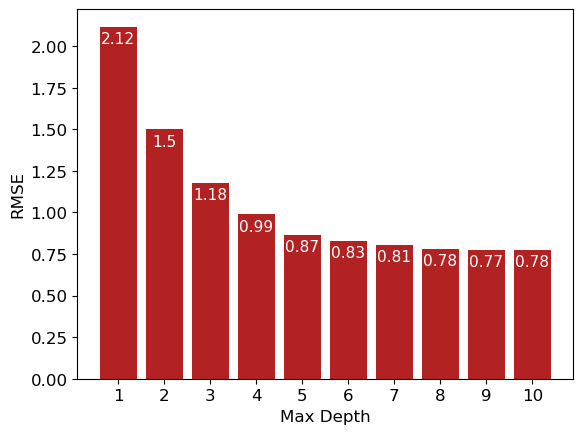

In [36]:
# RSME for different max_depth
rmse_list = []
for n in range(1, 11):
    dt = DecisionTreeRegressor(max_depth=n)
    dt.fit(X_train, y_trainxgb)
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_testxgb, y_pred)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

# plot
import matplotlib.pyplot as plt
# bar plot
plt.bar(range(10), rmse_list, color = 'firebrick')
plt.xlabel('Max Depth', fontsize = 12)
plt.xticks(range(10), list(range(1,11)), fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)
plt.yticks(fontsize = 12)
#plt.title('RMSE vs Max Depth')
# labels with values inside the bars
for i, v in enumerate(rmse_list):
    plt.text(i, v - 0.1, round(v,2), color='white', ha='center', fontsize = 11)
plt.show()

MSE:  0.9789283868906304
RMSE:  0.9894080992647223
Bin: [0, 9e-05]      RMSE: 0.431, Avg. Error: 0.033
Bin: [9e-05, 1]      RMSE: 0.847, Avg. Error: 0.006
Bin: [1, 10]         RMSE: 2.182, Avg. Error: -0.018
Bin: [10, 50]        RMSE: 4.713, Avg. Error: -0.188
Bin: [50, 100]       RMSE: 4.990, Avg. Error: -0.816
Total RSME 0.9894080992647223
Total Avg. Error 0.01984912167204171


[Text(0.5, 0.9, 'wind_speed <= 2.917\nsquared_error = 15.182\nsamples = 39803\nvalue = 0.837'),
 Text(0.25, 0.7, 'wind_speed <= 2.124\nsquared_error = 2.396\nsamples = 39321\nvalue = 0.481'),
 Text(0.125, 0.5, 'wind_speed <= 1.374\nsquared_error = 0.541\nsamples = 37948\nvalue = 0.271'),
 Text(0.0625, 0.3, 'track_distance <= -0.935\nsquared_error = 0.149\nsamples = 35175\nvalue = 0.132'),
 Text(0.03125, 0.1, 'squared_error = 0.691\nsamples = 4956\nvalue = 0.558'),
 Text(0.09375, 0.1, 'squared_error = 0.026\nsamples = 30219\nvalue = 0.063'),
 Text(0.1875, 0.3, 'rwi <= -2.285\nsquared_error = 2.162\nsamples = 2773\nvalue = 2.033'),
 Text(0.15625, 0.1, 'squared_error = 178.074\nsamples = 2\nvalue = 28.127'),
 Text(0.21875, 0.1, 'squared_error = 1.543\nsamples = 2771\nvalue = 2.014'),
 Text(0.375, 0.5, 'wind_speed <= 2.502\nsquared_error = 18.936\nsamples = 1373\nvalue = 6.271'),
 Text(0.3125, 0.3, 'rainfall_max_6h <= 1.416\nsquared_error = 6.311\nsamples = 773\nvalue = 4.38'),
 Text(0.281

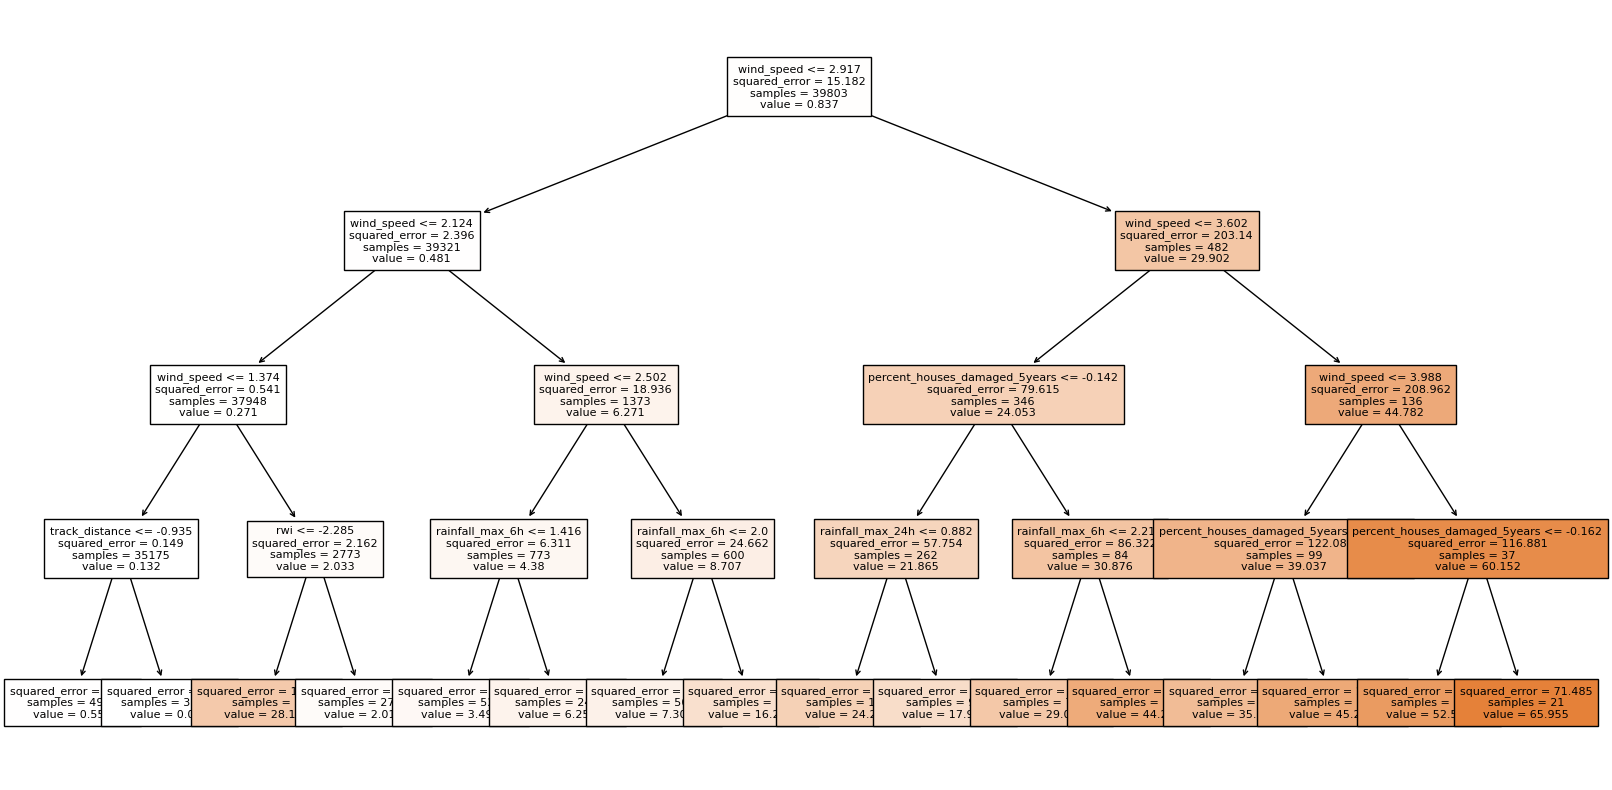

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_trainxgb)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_testxgb, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

eval_bins(y_pred, y_testxgb, y_test)[0]	

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=features, filled=True, fontsize=8)

MSE:  1.3872139913652883
RMSE:  1.177800488777827
Bin: [0, 9e-05]      RMSE: 0.479, Avg. Error: 0.042
Bin: [9e-05, 1]      RMSE: 0.949, Avg. Error: -0.004
Bin: [1, 10]         RMSE: 2.705, Avg. Error: 0.060
Bin: [10, 50]        RMSE: 5.610, Avg. Error: -0.451
Bin: [50, 100]       RMSE: 6.334, Avg. Error: -2.085
Total RSME 1.177800488777827
Total Avg. Error 0.02088394469066737


[Text(0.5, 0.875, 'wind_speed <= 2.917\nsquared_error = 15.182\nsamples = 39803\nvalue = 0.837'),
 Text(0.25, 0.625, 'wind_speed <= 2.124\nsquared_error = 2.396\nsamples = 39321\nvalue = 0.481'),
 Text(0.125, 0.375, 'wind_speed <= 1.374\nsquared_error = 0.541\nsamples = 37948\nvalue = 0.271'),
 Text(0.0625, 0.125, 'squared_error = 0.149\nsamples = 35175\nvalue = 0.132'),
 Text(0.1875, 0.125, 'squared_error = 2.162\nsamples = 2773\nvalue = 2.033'),
 Text(0.375, 0.375, 'wind_speed <= 2.502\nsquared_error = 18.936\nsamples = 1373\nvalue = 6.271'),
 Text(0.3125, 0.125, 'squared_error = 6.311\nsamples = 773\nvalue = 4.38'),
 Text(0.4375, 0.125, 'squared_error = 24.662\nsamples = 600\nvalue = 8.707'),
 Text(0.75, 0.625, 'wind_speed <= 3.602\nsquared_error = 203.14\nsamples = 482\nvalue = 29.902'),
 Text(0.625, 0.375, 'percent_houses_damaged_5years <= -0.142\nsquared_error = 79.615\nsamples = 346\nvalue = 24.053'),
 Text(0.5625, 0.125, 'squared_error = 57.754\nsamples = 262\nvalue = 21.865'),

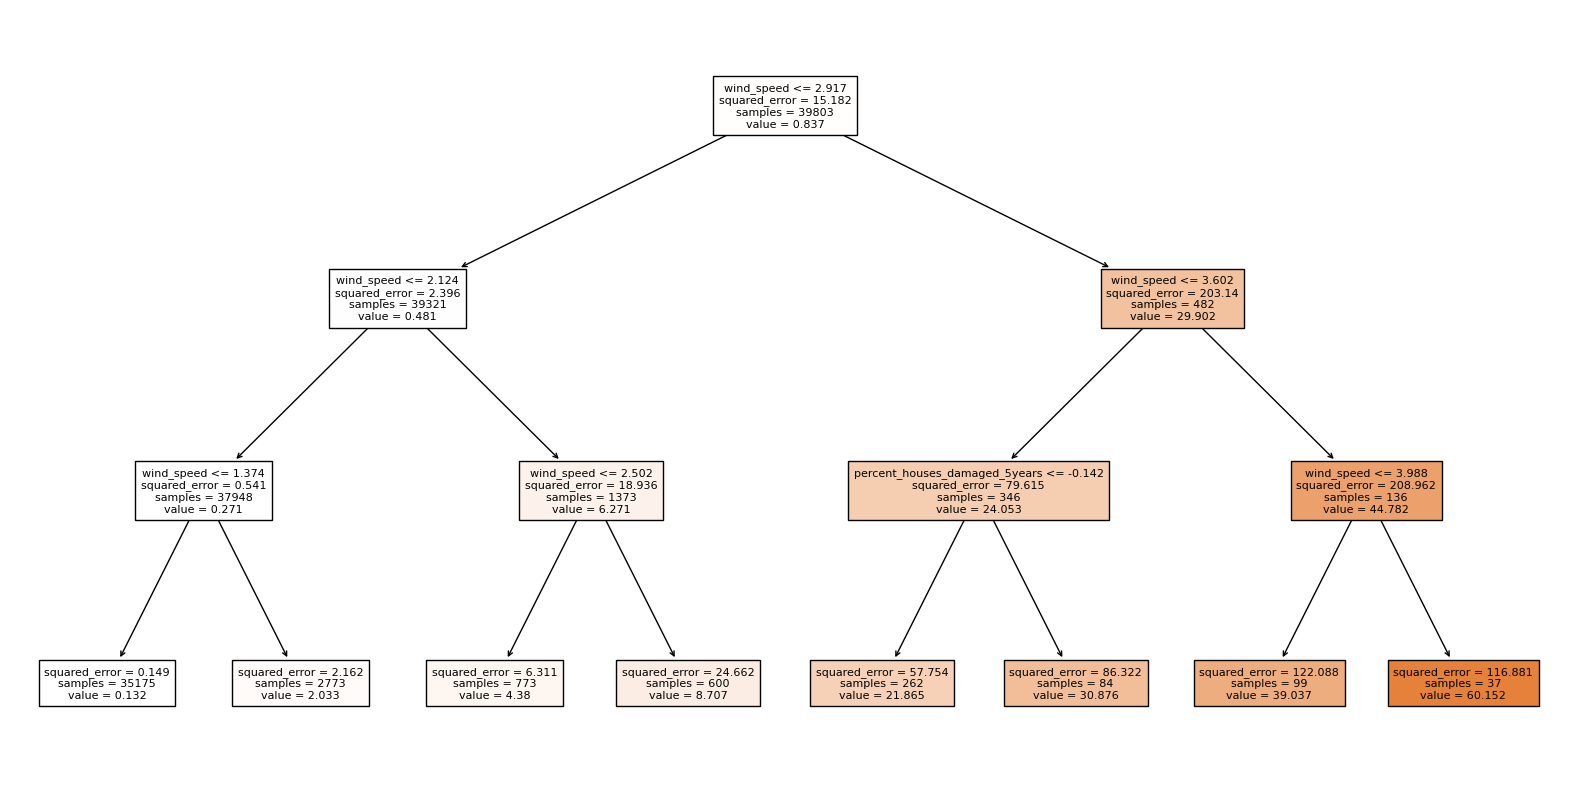

In [67]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_trainxgb)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_testxgb, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

eval_bins(y_pred, y_testxgb, y_test)[0]	

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=features, filled=True, fontsize=8)

### On original y values

In [81]:
# decision tree on original y values
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

MSE:  13.232374824765813
RMSE:  3.6376331349884383


In [82]:
eval_bins(y_pred, y_test, y_test)

Bin: [0, 9e-05]      RMSE: 1.047, Avg. Error: 0.202
Bin: [9e-05, 1]      RMSE: 1.961, Avg. Error: 0.770
Bin: [1, 10]         RMSE: 5.959, Avg. Error: 0.088
Bin: [10, 50]        RMSE: 15.756, Avg. Error: -7.826
Bin: [50, 100]       RMSE: 42.968, Avg. Error: -34.873
Total RSME 3.6376331349884383
Total Avg. Error 0.027292970152210567


[[[0, 9e-05],
  1.097003769844417,
  1.0473794774791116,
  0.20207954690875307,
  0.20207954690875307],
 [[9e-05, 1],
  3.845341849198499,
  1.9609543210382283,
  0.8681324109460469,
  0.7696283319978537],
 [[1, 10],
  35.50976142469524,
  5.959006748166614,
  3.196635775468863,
  0.08815960725124643],
 [[10, 50],
  248.243520478443,
  15.755745633845546,
  12.82070267003798,
  -7.82634945456882],
 [[50, 100],
  1846.256320033044,
  42.96808490069163,
  35.73693900013502,
  -34.87329227480171]]

In [83]:
# comparison to xgb
eval_bins(y_testxgb, y_test, y_test)

Bin: [0, 9e-05]      RMSE: 1.136, Avg. Error: 0.192
Bin: [9e-05, 1]      RMSE: 1.999, Avg. Error: 0.734
Bin: [1, 10]         RMSE: 4.687, Avg. Error: 0.051
Bin: [10, 50]        RMSE: 14.226, Avg. Error: -8.132
Bin: [50, 100]       RMSE: 41.210, Avg. Error: -34.199
Total RSME 3.380470576314499
Total Avg. Error 0.008161959256864998


[[[0, 9e-05],
  1.2902735759361161,
  1.135902097865884,
  0.21502249258145822,
  0.19150011665102495],
 [[9e-05, 1],
  3.9972098396849676,
  1.9993023382382584,
  0.8347134237996034,
  0.7335225681573315],
 [[1, 10],
  21.970286412385306,
  4.68724721050483,
  2.9266835564165357,
  0.05117580933592094],
 [[10, 50],
  202.37542334777677,
  14.225871619966798,
  11.380414128837275,
  -8.13186889857255],
 [[50, 100],
  1698.2507324230814,
  41.20983781117176,
  34.81197656244997,
  -34.198700814791984]]

# Others approaches

In [131]:
# elastic net
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.01, l1_ratio=0.0)
en.fit(X_train, y_trainxgb)
y_pred = en.predict(X_test)
mse = mean_squared_error(y_testxgb, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
eval_bins(y_testxgb, y_pred, y_test)

MSE:  9.23502966018522
RMSE:  3.038919159863457
Bin: [0, 9e-05]      RMSE: 1.487, Avg. Error: -0.030
Bin: [9e-05, 1]      RMSE: 2.110, Avg. Error: -1.092
Bin: [1, 10]         RMSE: 3.683, Avg. Error: -0.807
Bin: [10, 50]        RMSE: 13.993, Avg. Error: 8.021
Bin: [50, 100]       RMSE: 29.431, Avg. Error: 23.816
Total RSME 3.038919159863457
Total Avg. Error -0.004733743402278154


[[[0, 9e-05],
  2.209855182370267,
  1.4865581664940888,
  1.0532394085876182,
  -0.029518724671263638],
 [[9e-05, 1],
  4.451591917155588,
  2.109879597786468,
  1.675385235105282,
  -1.0920123127646537],
 [[1, 10],
  13.56659873913939,
  3.683286404712426,
  2.501890764815493,
  -0.807482414420652],
 [[10, 50],
  195.81059438440448,
  13.993233878714545,
  9.149574267684015,
  8.020750440319505],
 [[50, 100],
  866.1975174987027,
  29.431233706705243,
  24.052568038135902,
  23.816179786628933]]

# Evaluate Performance per bin

Text(0.5, 1.0, 'Target variable bins')

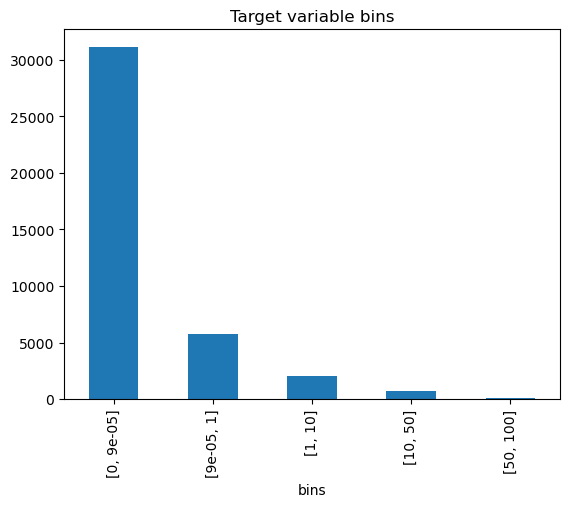

In [87]:
# histogram y_train
import matplotlib.pyplot as plt
bins = [[0, 0.00009], [0.00009, 1], [1,10],[10,50], [50,100]]

# create table with count of y_train values in each bin
y_train_df = pd.DataFrame(y_train)
y_train_df['bins'] = None
for v in bins:
    y_train_df.loc[(y_train_df['percent_houses_damaged'] >= v[0]) & (y_train_df['percent_houses_damaged'] <= v[1]), 'bins'] = str(v)
y_train_df['bins'].value_counts().plot(kind='bar') 
plt.title("Target variable bins")

In [90]:
eval_bins(y_pred, y_testxgb, y_test)

Bin: [0, 9e-05]      RMSE: 1.512, MAE: 1.079
Bin: [9e-05, 1]      RMSE: 2.134, MAE: 1.701
Bin: [1, 10]         RMSE: 3.684, MAE: 2.528
Bin: [10, 50]        RMSE: 13.898, MAE: 9.094
Bin: [50, 1000]      RMSE: 29.287, MAE: 23.912
Total RSME 3.0391676959600717


[[[0, 9e-05], 2.287655505090006, 1.5124997537487421, 1.0788001669892942],
 [[9e-05, 1], 4.551897560511325, 2.13351764944922, 1.700972352287781],
 [[1, 10], 13.568282221708635, 3.6835149275805352, 2.5283711167380316],
 [[10, 50], 193.15952372423348, 13.898184188023754, 9.094483443558097],
 [[50, 1000], 857.7214119321927, 29.286881225767157, 23.91218916622046]]

In [91]:
# Decision Tree RSME for each bin
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_trainxgb)
y_pred = dt.predict(X_test)

eval_bins(y_pred, y_testxgb, y_test)

Bin: [0, 9e-05]      RMSE: 0.437, MAE: 0.147
Bin: [9e-05, 1]      RMSE: 0.851, MAE: 0.421
Bin: [1, 10]         RMSE: 2.183, MAE: 1.212
Bin: [10, 50]        RMSE: 4.714, MAE: 3.207
Bin: [50, 1000]      RMSE: 4.992, MAE: 3.652
Total RSME 0.992136623489166


[[[0, 9e-05], 0.1906962848761839, 0.4366878574865391, 0.14713004025948428],
 [[9e-05, 1], 0.7241408408904624, 0.8509646531381091, 0.42108410416663283],
 [[1, 10], 4.766126721834252, 2.183146060581896, 1.2115416092151285],
 [[10, 50], 22.217254475044136, 4.713518269302044, 3.2073970757255488],
 [[50, 1000], 24.92250960887014, 4.992244946802003, 3.651843042153591]]

In [92]:
# Decision Tree RSME for each bin
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_trainxgb)
y_pred = dt.predict(X_test)

eval_bins(y_pred, y_testxgb, y_test)

Bin: [0, 9e-05]      RMSE: 0.483, MAE: 0.186
Bin: [9e-05, 1]      RMSE: 0.952, MAE: 0.465
Bin: [1, 10]         RMSE: 2.706, MAE: 1.403
Bin: [10, 50]        RMSE: 5.610, MAE: 3.961
Bin: [50, 1000]      RMSE: 6.335, MAE: 4.953
Total RSME 1.179598070159685


[[[0, 9e-05], 0.23321144765364493, 0.48291971139480827, 0.1858546371114978],
 [[9e-05, 1], 0.9061945162446934, 0.9519424962909753, 0.4652038402628816],
 [[1, 10], 7.321296994866482, 2.7057895326256403, 1.4030532485654525],
 [[10, 50], 31.47509917980246, 5.61026730020972, 3.9611661468117414],
 [[50, 1000], 40.135572382711885, 6.335264192021662, 4.953273966456807]]

# Model based tree
## EDA - Partial dependence plots

In [187]:
features

['wind_speed',
 'track_distance',
 'total_houses',
 'rainfall_max_6h',
 'rainfall_max_24h',
 'rwi',
 'mean_slope',
 'std_slope',
 'mean_tri',
 'std_tri',
 'mean_elev',
 'coast_length',
 'with_coast',
 'urban',
 'rural',
 'water',
 'total_pop',
 'percent_houses_damaged_5years']

In [188]:
X_train_df

wind_speed  track_distance  total_houses  rainfall_max_6h  \
0       -0.856555        1.171554      1.135117        -0.622338   
1       -0.721854        1.615811     -0.266746        -0.775814   
2       -0.707059        1.334032     -0.251563        -1.082427   
3        2.279204       -1.611215      2.719272         0.107935   
4       -0.640732       -0.426439      0.013277        -0.354515   
...           ...             ...           ...              ...   
39798    2.663132       -1.609933     -0.209554         0.479312   
39799    1.424884       -0.833592     -0.168857        -0.244553   
39800   -0.404339        0.609623     -0.270483        -0.972802   
39801   -0.441242        1.275424     -0.175807        -0.580512   
39802   -0.456382       -1.730593     -0.231711        -0.058358   

       rainfall_max_24h       rwi  mean_slope  std_slope  mean_tri   std_tri  \
0             -0.614954  1.812785   -1.253141  -1.761114 -1.230703 -1.630404   
1             -0.955256  0.092268   -0.511528  -0.355795 -0.415348 -0.231075   
2             -1.104843  0.184509   -0.841787  -1.132003 -0.812952 -1.061138   
3              0.628674  3.700699   -0.886581   0.055877 -0.924670  0.161881   
4             -0.217106  0.445665   -0.101521   0.727710 -0.090182  0.772969   
...                 ...       ...         ...        ...       ...       ...   
39798          0.817730 -1.200221    0.179528   0.368906  0.206790  0.261839   
39799          0.146413  0.211687   -1.088423  -1.271972 -1.126675 -1.271957   
39800         -0.959236 -0.642774    0.462960   1.558501  0.522721  1.727882   
39801         -0.327223 -1.067426   -1.031316  -1.171678 -1.053768 -1.151963   
39802          0.527346  0.837399    1.183045   1.362528  1.084944  1.380097   

       mean_elev  coast_length  with_coast     urban     rural     water  \
0      -0.736261      1.419780    0.935205  2.616238 -0.995806 -0.532048   
1      -0.667434      1.360675    0.935205 -0.731012 -1.348081  1.783850   
2      -0.695688      0.269003    0.935205 -0.731012 -1.429376  1.865587   
3      -0.583968      0.649223    0.935205  1.872405 -1.293885  0.203590   
4      -0.011754     -0.657215   -1.069284 -0.266117  0.928162 -0.777261   
...          ...           ...         ...       ...       ...       ...   
39798  -0.186781     -0.657215   -1.069284 -0.591544  1.117849 -0.777261   
39799  -0.704177      0.546400    0.935205 -0.033669 -1.348081  1.375162   
39800  -0.338993     -0.046705    0.935205 -0.731012 -1.050002  1.484145   
39801  -0.650142     -0.389708    0.935205 -0.731012  1.199144 -0.777261   
39802  -0.103491      0.744351    0.935205 -0.684523 -0.291254  0.694016   

       total_pop  percent_houses_damaged_5years  
0       0.976106                      -0.240661  
1      -0.273998                      -0.241398  
2      -0.262936                      -0.241398  
3       2.745908                      -0.128161  
4      -0.147534                      -0.241248  
...          ...                            ...  
39798  -0.220732                      -0.088301  
39799  -0.146397                      -0.145803  
39800  -0.279054                       0.142771  
39801  -0.183397                      -0.173143  
39802  -0.244261                      -0.233513  

[39803 rows x 18 columns]

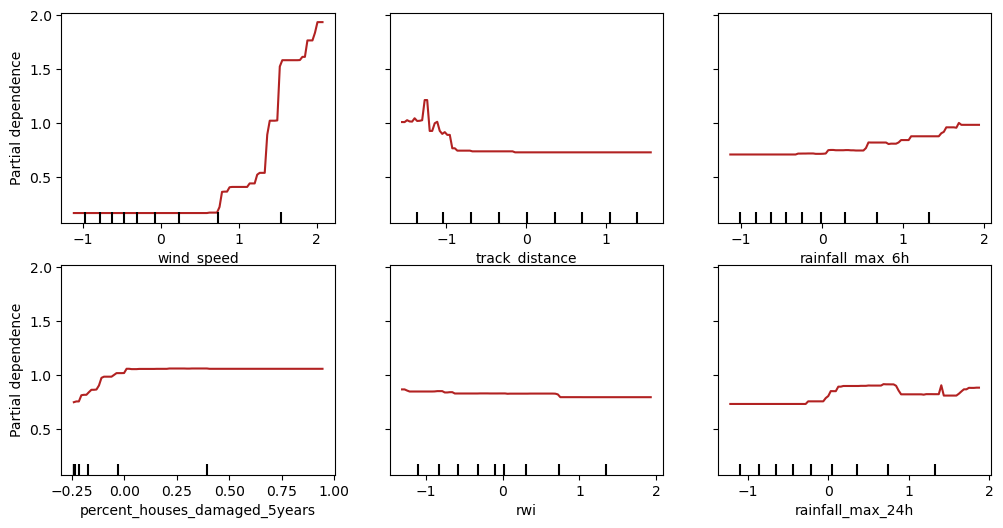

In [64]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

model = Load_Model('xgb_model')
X_train_df = pd.DataFrame(Load_Model("X_train"), columns = Load_Model("features"))

fig, ax = plt.subplots(figsize=(12, 6))
# show grid
ax.grid(True)
display = PartialDependenceDisplay.from_estimator( model, X_train_df, ["wind_speed", "track_distance", "rainfall_max_6h", "percent_houses_damaged_5years", "rwi", "rainfall_max_24h"], ax=ax, line_kw={"color": "firebrick"})
#plt.show()

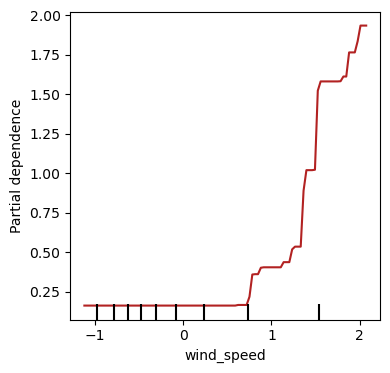

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(4, 4))
# show grid
ax.grid(True)
display = PartialDependenceDisplay.from_estimator( model, X_train_df, ["wind_speed"], ax=ax, line_kw={"color": "firebrick"})


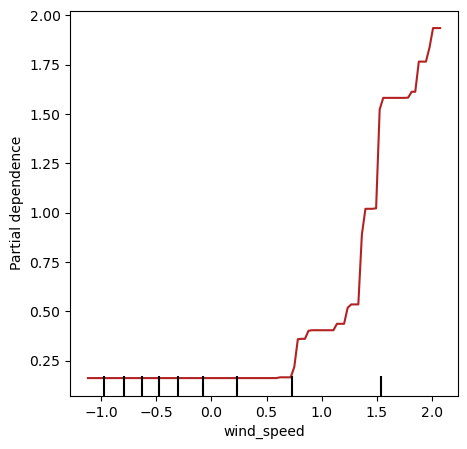

In [67]:
fig, ax = plt.subplots(figsize=(5, 5))
# show grid
ax.grid(True)
display = PartialDependenceDisplay.from_estimator( model, X_train_df, ["wind_speed"], ax=ax, line_kw={"color": "firebrick"})


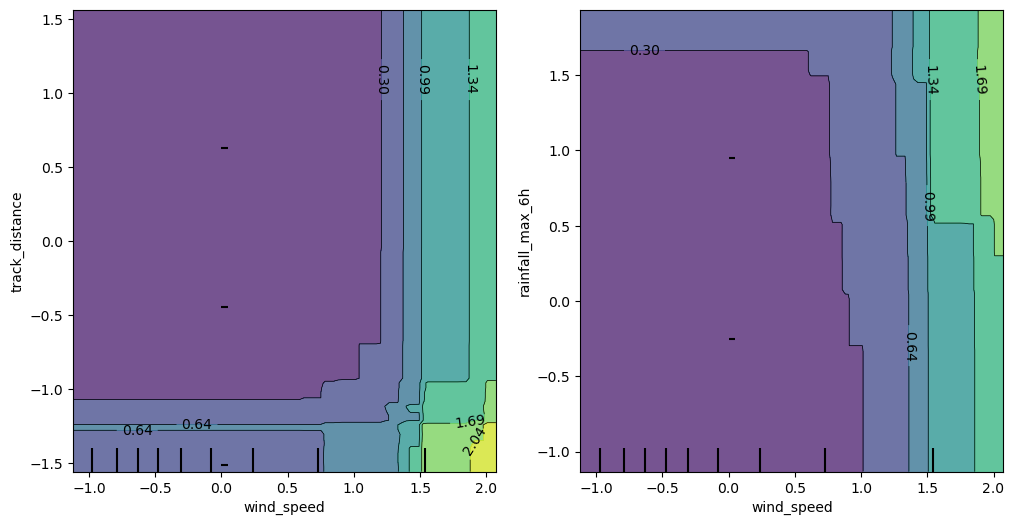

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
display = PartialDependenceDisplay.from_estimator( model, X_train_df, [("wind_speed", "track_distance"), ("wind_speed", "rainfall_max_6h")], ax=ax)

In [13]:
y_testxgb_df = pd.DataFrame(y_testxgb)
y_trainxgb_df = pd.DataFrame(y_trainxgb)

## PDP Split

In [189]:
# test simple function tree model
splits = [0.75, 1.5, 1.75, 5]

# split X_train into 3 groups
X_train_split = X_train_df.copy()
X_train_split['group'] = None
for i, split in enumerate(splits):
    if i == 0:
        X_train_split.loc[X_train_split['wind_speed'] <= split, 'group'] = i
    else:
        X_train_split.loc[(X_train_split['wind_speed'] > splits[i-1]) & (X_train_split['wind_speed'] <= split), 'group'] = i

X_train_split['group'].value_counts()	

# train linear model for each group
models = []
for i in range(4):
    X_train_group = X_train_split[X_train_split['group'] == i]
    y_train_group = y_trainxgb_df[y_trainxgb_df.index.isin(X_train_group.index)]
    lr = LinearRegression()
    lr.fit(X_train_group.drop(columns="group"), y_train_group)
    models.append(lr)

models

[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression()]

In [20]:
# reset indices of y_test_df
y_test_df = pd.DataFrame(y_test, columns = ['percent_houses_damaged'])

y_test_df = y_test_df.reset_index(drop=True)
y_test_df["y_testxgb"] = y_testxgb

print(y_test_df.shape)
print(X_test_df.shape)
y_test_df

(9951, 2)
(9951, 18)


percent_houses_damaged  y_testxgb
0                   0.000000   0.000000
1                   0.083553   0.772264
2                   0.000000   0.121737
3                   0.000000   0.036116
4                   0.000000   0.092302
...                      ...        ...
9946                0.000000   0.069846
9947                0.000000   0.000000
9948                0.000000   0.838818
9949                6.803083   2.310968
9950                0.000000   0.022677

[9951 rows x 2 columns]

In [191]:
y_testxgb.min()

0.0

In [192]:
X_test_group = X_test_df.copy()
X_test_group['group'] = None

# splitting X_test into groups as well
for i, split in enumerate(splits):
    if i == 0:
        X_test_group.loc[X_test_group['wind_speed'] <= split, 'group'] = i
    else:
        X_test_group.loc[(X_test_group['wind_speed'] > splits[i-1]) & (X_test_group['wind_speed'] <= split), 'group'] = i

In [193]:
# check:  X_test_group with group 1
X_test_group.loc[X_test_group['group']==1]

wind_speed  track_distance  total_houses  rainfall_max_6h  \
10      1.155233       -1.205913     -0.269787         2.646182   
14      0.963849       -0.844190     -0.264030         1.161687   
27      0.784740       -1.550042      1.012394         0.255001   
31      1.394683       -1.142658     -0.265617         3.933689   
34      1.406347       -0.930275     -0.272048         0.705983   
...          ...             ...           ...              ...   
9802    0.757641       -0.639861     -0.135481        -0.400727   
9816    1.144742       -1.150530     -0.155394        -0.857442   
9920    1.433417       -1.231654     -0.235717         1.341472   
9943    1.228572       -0.482679     -0.254398         2.241749   
9948    0.976247       -1.385082     -0.054516         0.491792   

      rainfall_max_24h       rwi  mean_slope  std_slope  mean_tri   std_tri  \
10            1.454055 -0.233456    0.595866   0.903621  0.551972  0.798855   
14            0.608441  1.034851   -0.513180  -0.595970 -0.491564 -0.624161   
27            0.274441  2.800393   -1.210973  -0.906649 -1.238276 -0.899288   
31            2.331178 -0.100972    0.224671   0.362104  0.198716  0.215558   
34            0.862839 -0.100972    0.079003   0.050270  0.207463  0.045179   
...                ...       ...         ...        ...       ...       ...   
9802         -0.187918 -0.223573   -0.307853   0.084338 -0.306875  0.063359   
9816         -0.849119  0.424838   -0.409198   0.063802 -0.421016  0.009617   
9920          0.864165  0.099474    1.220702   1.140136  1.063808  1.030064   
9943          1.285065  0.515277    0.209782  -0.017621  0.229044 -0.120668   
9948          0.842938 -0.292294   -0.259207   0.584131 -0.253782  0.591230   

      mean_elev  coast_length  with_coast     urban     rural     water  \
10    -0.390895     -0.328652    0.935205 -0.731012 -1.320983  1.756604   
14    -0.650052     -0.169292    0.935205 -0.591544 -1.375180  1.729358   
27    -0.709263      0.459730    0.935205  1.918894 -1.320983  0.203590   
31    -0.639504     -0.292878    0.935205 -0.731012 -1.456474  1.892833   
34    -0.579694      0.038059    0.935205 -0.731012 -1.293885  1.729358   
...         ...           ...         ...       ...       ...       ...   
9802  -0.525414     -0.657215   -1.069284  0.198779  0.657181 -0.777261   
9816  -0.433725     -0.657215   -1.069284  0.012821  0.765573 -0.777261   
9920   0.528615      0.048406    0.935205 -0.350643 -0.746995  0.956567   
9943  -0.423302      0.002461    0.935205 -0.731012 -1.241928  1.677118   
9948  -0.455778      0.422846    0.935205 -0.126648  0.684279 -0.613785   

      total_pop  percent_houses_damaged_5years group  
10    -0.273727                      -0.177393     1  
14    -0.269870                      -0.194878     1  
27     2.220218                       0.018229     1  
31    -0.264547                      -0.172524     1  
34    -0.279874                      -0.239035     1  
...         ...                            ...   ...  
9802  -0.036513                      -0.241398     1  
9816  -0.144811                      -0.227131     1  
9920  -0.197875                      -0.210926     1  
9943  -0.248723                      -0.241398     1  
9948  -0.100021                      -0.241398     1  

[952 rows x 19 columns]

In [194]:
# predict y_test for each group

#count X_test_group
print(X_test_group['group'].value_counts())

for i in range(4):
    #print(i)
    X_test_group_i = X_test_group[X_test_group['group'] == i]
    #print(X_test_group.shape)
    y_pred = models[i].predict(X_test_group_i.drop(columns=['group']))
    y_test_df.loc[X_test_group_i.index, 'FunctionTree'] = y_pred

y_test_df

group
0    7940
1     952
3     816
2     243
Name: count, dtype: int64


percent_houses_damaged  y_testxgb  FunctionTree
0                   0.000000   0.000000      0.004485
1                   0.083553   0.772264     -0.447407
2                   0.000000   0.121737      0.193024
3                   0.000000   0.036116      0.141009
4                   0.000000   0.092302      0.031897
...                      ...        ...           ...
9946                0.000000   0.069846      0.128412
9947                0.000000   0.000000     -0.059192
9948                0.000000   0.838818      1.329368
9949                6.803083   2.310968      2.605478
9950                0.000000   0.022677     -0.027963

[9951 rows x 3 columns]

In [195]:
# evaluate Function Tree Result
mse = mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree'])
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

MSE:  2.4708161301690197
RMSE:  1.5718829887014554


In [146]:
# # evaluate per bin
# bins = [[0, 0.00009], [0.00009, 1], [1,10],[10,50], [50,100]]

# for v in bins:
#     y_test_df_v = y_test_df[y_test_df['bins'] == str(v)]
#     mse = mean_squared_error(y_test_df_v['y_testxgb'], y_test_df_v['FunctionTree'])
#     rmse = np.sqrt(mse)
#     print("Bin: ", v, " RMSE: ", rmse)

# print("Total RSME", np.sqrt(mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree'])))

## Function solution - windspeed splits

### PDP separation

In [11]:
def predfunctiontree(X, models, conditions, n= 18, featlist = None):
    if featlist is None:
        featlist = X.columns
    fullprediction = []
    for index, row in X.iterrows():
        i = pd.DataFrame(row).transpose()
        i = i[featlist[:n]]
        case = matchfunction(row, conditions)
        predi = models[case].predict(i)[0][0]
        fullprediction.append(predi)
    return fullprediction

def matchfunction(x, condition):
    for f, cond in zip(condition.keys(), condition.values()):
        case = f
        for c in cond.keys():
            if x[c] > cond[c]:
                case = None
                break
        if case is not None:
            return case
    raise ValueError("No case found")

In [18]:
conditionsT1 = {1: {"wind_speed": 0.75}, 
                2: {"wind_speed": 1.5}, 
                3: {"wind_speed": 1.75}, 
                4: {"wind_speed": 5}
                }	

matchfunction(X_test_df.iloc[1], conditionsT1)

4

In [10]:
def buildfunctions(X, y, conditions, n = 18, featlist = None):
    if featlist is None:
        featlist = X.columns
    y = pd.DataFrame(y)
    y = y.reset_index(drop = True)
    models = {}

    X = X[featlist[:n]]

    unassigned = X.index
    for g, cond in zip(conditions.keys(), conditions.values()):
        idx = unassigned
        for c in cond.keys():
            # collect indexes of all conditions and take intersection
            idx_cond = X.loc[X[c] < cond[c]].index
            idx = idx_cond.intersection(idx)
        unassigned = unassigned.difference(idx) #update unassigned indices
        X_group = X.loc[idx]
        y_group = y.loc[idx]

        lr = LinearRegression()
        lr.fit(X_group, y_group)
        models[g] = lr
    return models

In [46]:
models2 = buildfunctions(X_train_df, y_trainxgb_df, conditionsT1)
models2

{1: LinearRegression(),
 2: LinearRegression(),
 3: LinearRegression(),
 4: LinearRegression()}

In [47]:
p = predfunctiontree(X_test_df, models2, conditionsT1)

In [63]:
y_test_df["FunctionTree_PDP"]  = p
y_test_df

percent_houses_damaged  y_testxgb  FunctionTree_PDP
0                   0.000000   0.000000          0.004326
1                   0.083553   0.772264          1.548210
2                   0.000000   0.121737          0.164278
3                   0.000000   0.036116          0.101522
4                   0.000000   0.092302          0.090306
...                      ...        ...               ...
9946                0.000000   0.069846          0.166411
9947                0.000000   0.000000          0.009873
9948                0.000000   0.838818          0.801729
9949                6.803083   2.310968          2.409916
9950                0.000000   0.022677         -0.072601

[9951 rows x 3 columns]

In [51]:
mse = mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree_PDP'])
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
eval_bins(y_test_df['FunctionTree_PDP'], y_test_df['y_testxgb'], y_test)

MSE:  2.4703792284881483
RMSE:  1.5717440085739625
Bin: [0, 9e-05]      RMSE: 0.632, Avg. Error: 0.004
Bin: [9e-05, 1]      RMSE: 1.532, Avg. Error: -0.002
Bin: [1, 10]         RMSE: 3.568, Avg. Error: 0.585
Bin: [10, 50]        RMSE: 6.000, Avg. Error: -0.415
Bin: [50, 100]       RMSE: 13.037, Avg. Error: -7.713
Total RSME 1.5717440085739625
Total Avg. Error 0.0023608564010025447


[[[0, 9e-05],
  0.39895977943547445,
  0.631632630122506,
  0.15819760441353284,
  0.003640374290800408],
 [[9e-05, 1],
  2.3483824472147132,
  1.5324432933112773,
  0.6612041651168911,
  -0.0017441927146254865],
 [[1, 10],
  12.730686649271282,
  3.5680087793153317,
  2.2348912319501815,
  0.5845961429478997],
 [[10, 50],
  35.99620742968194,
  5.999683944149219,
  4.3132332583615876,
  -0.41506035221669796],
 [[50, 100],
  169.95788454959893,
  13.03678965656802,
  9.870901575085046,
  -7.712525890390602]]

In [18]:
# add windspeed power 4 to LR part

X_train_pwr = X_train_df.copy()
X_train_pwr["ws_pwr"] = X_train_pwr["wind_speed"]**4
X_test_pwr = X_test_df.copy()
X_test_pwr["ws_pwr"] = X_test_pwr["wind_speed"]**4 

In [21]:
models_pwr = buildfunctions(X_train_pwr, y_trainxgb_df, conditionsT1, n=19, featlist=X_train_pwr.columns)
p = predfunctiontree(X_test_pwr, models_pwr, conditionsT1, n=19, featlist = X_train_pwr.columns)
y_test_df["FunctionTree_PDP_pwr"]  = p

eval_bins(y_test_df['FunctionTree_PDP_pwr'], y_test_df['y_testxgb'], y_test)[0]

Bin: [0, 9e-05]      RMSE: 0.402, Avg. Error: 0.008
Bin: [9e-05, 1]      RMSE: 0.811, Avg. Error: 0.086
Bin: [1, 10]         RMSE: 2.434, Avg. Error: 0.243
Bin: [10, 50]        RMSE: 5.608, Avg. Error: -0.580
Bin: [50, 100]       RMSE: 8.204, Avg. Error: -3.829
Total RSME 1.1428203443209224
Total Avg. Error 0.009455863491674231


[[0, 9e-05],
 0.16135848266433425,
 0.40169451410784074,
 0.12772249010250183,
 0.008248916513863162]

### Wind speed: DT conditions

In [208]:
conditionsT1b = {
                1: {"wind_speed": 2.1}, 
                2: {"wind_speed": 2.9}, 
                3: {"wind_speed": 3.6}, 
                4: {"wind_speed": 5}
                }	

In [212]:
models = buildfunctions(X_train_df, y_trainxgb_df, conditionsT1b)
p = predfunctiontree(X_test_df, models, conditionsT1b)
y_test_df["FunctionTree_DT"]  = p

In [213]:
y_test_df

percent_houses_damaged  y_testxgb  FunctionTree  FunctionTree_PDP  \
0                   0.000000   0.000000      0.004485          0.003427   
1                   0.083553   0.772264     -0.447407         -0.479330   
2                   0.000000   0.121737      0.193024          0.191537   
3                   0.000000   0.036116      0.141009          0.140878   
4                   0.000000   0.092302      0.031897          0.031198   
...                      ...        ...           ...               ...   
9946                0.000000   0.069846      0.128412          0.127328   
9947                0.000000   0.000000     -0.059192         -0.060599   
9948                0.000000   0.838818      1.329368          1.330064   
9949                6.803083   2.310968      2.605478          2.602701   
9950                0.000000   0.022677     -0.027963         -0.028555   

      FunctionTree_PDP_pwr  FunctionTree_DT  
0                -0.000843        -0.066252  
1                 0.987639         1.002691  
2                 0.187185         0.311617  
3                 0.139146         0.304449  
4                 0.037331         0.246254  
...                    ...              ...  
9946              0.130746        -0.047621  
9947             -0.033255        -0.420897  
9948              1.260277         0.851364  
9949              1.277664         1.232149  
9950             -0.029582         0.189016  

[9951 rows x 6 columns]

In [217]:
mse = mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree_DT'])

print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
eval_bins(y_test_df['FunctionTree_DT'], y_test_df['y_testxgb'], y_test_df['percent_houses_damaged'])[0]

MSE:  1.1244432336097416
RMSE:  1.0603976771050292
Bin: [0, 9e-05]      RMSE: 0.518, Avg. Error: 0.033
Bin: [9e-05, 1]      RMSE: 0.818, Avg. Error: 0.072
Bin: [1, 10]         RMSE: 2.398, Avg. Error: -0.295
Bin: [10, 50]        RMSE: 4.192, Avg. Error: -0.859
Bin: [50, 100]       RMSE: 8.200, Avg. Error: -4.036
Total RSME 1.0603976771050292
Total Avg. Error -0.006355390822082986


[[0, 9e-05],
 0.268216037045827,
 0.5178957781695339,
 0.2558870393993541,
 0.033186699634805326]

In [226]:
# add windspeed power 4 to LR part

models_pwr = buildfunctions(X_train_pwr, y_trainxgb_df, conditionsT1b, n=19, featlist=X_train_pwr.columns)
p = predfunctiontree(X_test_pwr, models_pwr, conditionsT1b, n=19, featlist = X_train_pwr.columns)
y_test_df["FunctionTree_PDP_pwr"]  = p

eval_bins(y_test_df['FunctionTree_PDP_pwr'], y_test_df['y_testxgb'], y_test)[0]

Bin: [0, 9e-05]      RMSE: 0.461, Avg. Error: 0.015
Bin: [9e-05, 1]      RMSE: 0.684, Avg. Error: 0.098
Bin: [1, 10]         RMSE: 2.299, Avg. Error: -0.083
Bin: [10, 50]        RMSE: 4.135, Avg. Error: -0.621
Bin: [50, 100]       RMSE: 7.928, Avg. Error: -3.879
Total RSME 1.0029608006393027
Total Avg. Error -0.001171226191385387


[[0, 9e-05],
 0.2122873347352923,
 0.460746497257757,
 0.1726640963487482,
 0.014998111715180189]

In [223]:
# reduce n / without power of wind_speed
n = 5
models = buildfunctions(X_train_df, y_trainxgb_df, conditionsT1b, n = n, featlist = shap_list)
p = predfunctiontree(X_test_df, models, conditionsT1b, n = n, featlist = shap_list)
y_test_df["FunctionTree_n5"]  = p

In [224]:
mse = mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree_n5'])
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
eval_bins(y_test_df['FunctionTree_n5'], y_test_df['y_testxgb'], y_test_df['percent_houses_damaged'])

# 1.0714408742673005 - 5 var better than 10 / better in last bin

MSE:  1.146527888906608
RMSE:  1.0707604255418706
Bin: [0, 9e-05]      RMSE: 0.497, Avg. Error: 0.031
Bin: [9e-05, 1]      RMSE: 0.885, Avg. Error: 0.095
Bin: [1, 10]         RMSE: 2.438, Avg. Error: -0.322
Bin: [10, 50]        RMSE: 4.296, Avg. Error: -0.768
Bin: [50, 100]       RMSE: 8.117, Avg. Error: -3.723
Total RSME 1.0707604255418706
Total Avg. Error -0.0036399543716469566


[[[0, 9e-05],
  0.24690943084180605,
  0.4968998197240627,
  0.2508000660146801,
  0.030858192292354255],
 [[9e-05, 1],
  0.7825370841258358,
  0.8846112615865999,
  0.5346734091358153,
  0.09525778686476113],
 [[1, 10],
  5.943113920309998,
  2.4378502661792005,
  1.320291405964567,
  -0.3215620118803879],
 [[10, 50],
  18.4535815012791,
  4.295763203585493,
  2.891832778489315,
  -0.7684307295754217],
 [[50, 100],
  65.89351078398585,
  8.117481800656275,
  6.1812182240853675,
  -3.72343546722874]]

In [196]:
LRweights = pd.DataFrame(columns = ['Model 1', "Model 2"], index = shap_list[:5])

LRweights['Model 1'] = models[1].coef_[0]
LRweights["Model 2"] = models[2].coef_[0]
LRweights["Model 3"] = models[3].coef_[0]
LRweights["Model 4"] = models[4].coef_[0]
# add row with intercepts
LRweights.loc['Intercept'] = [models[1].intercept_[0], models[2].intercept_[0], models[3].intercept_[0], models[4].intercept_[0]]
LRweights.loc['Windspeed Threshold'] = [2.1, 2.9, 3.6, 5]

LRweights

Model 1    Model 2    Model 3     Model 4
wind_speed                     0.456376  10.777813  12.317641   44.262382
track_distance                 0.014613   2.131661 -13.410789  -24.399576
rainfall_max_6h                0.218081   2.174790   3.233286   -5.850996
percent_houses_damaged_5years  0.022835   1.286481   0.887156   -0.166619
rainfall_max_24h              -0.042142  -0.100555  -5.955500   -0.419109
Intercept                      0.327619 -19.312902 -35.397506 -161.053822
Windspeed Threshold            2.100000   2.900000   3.600000    5.000000

In [198]:
rsme = []
for i in [1,2,3,4,5,6,8,10,12,14, 16,18]:
    models = buildfunctions(X_train_df, y_trainxgb_df, conditionsT1b, n = i, featlist = shap_list)
    p = predfunctiontree(X_test_df, models, conditionsT1b, n = i, featlist = shap_list)
    mse = mean_squared_error(y_test_df['y_testxgb'], p)
    rsme.append(np.sqrt(mse))

([<matplotlib.axis.XTick at 0x1cde3b4d4d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18')])

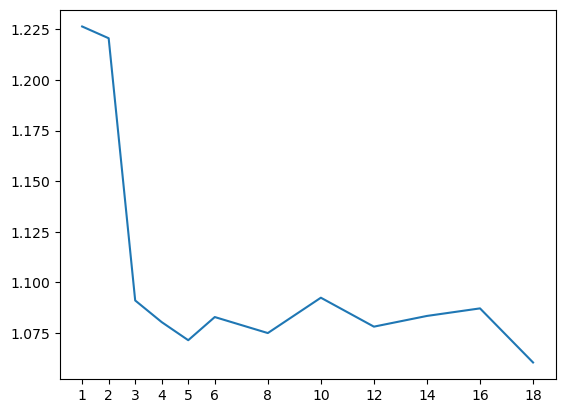

In [201]:
# plot rsme
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,6,8,10,12,14, 16,18], rsme)
plt.xticks([1,2,3,4,5,6,8,10,12,14, 16,18])

In [232]:
# reduce n 
n = 6
# add ws_pwr to shaplist
featlist = ["ws_pwr"]+shap_list[:n]

models = buildfunctions(X_train_pwr, y_trainxgb_df, conditionsT1b, n = n+1, featlist = featlist)
p = predfunctiontree(X_test_pwr, models, conditionsT1b, n = n+1, featlist = featlist)
y_test_df["FunctionTree_n5+pwr"]  = p

mse = mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree_n5+pwr'])
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
eval_bins(y_test_df['FunctionTree_n5+pwr'], y_test_df['y_testxgb'], y_test_df['percent_houses_damaged'])[0]

MSE:  1.0193384482598251
RMSE:  1.009622923798695
Bin: [0, 9e-05]      RMSE: 0.439, Avg. Error: 0.015
Bin: [9e-05, 1]      RMSE: 0.762, Avg. Error: 0.118
Bin: [1, 10]         RMSE: 2.316, Avg. Error: -0.101
Bin: [10, 50]        RMSE: 4.253, Avg. Error: -0.480
Bin: [50, 100]       RMSE: 7.703, Avg. Error: -3.624
Total RSME 1.009622923798695
Total Avg. Error 0.00450375604194648


[[0, 9e-05],
 0.1928698634283296,
 0.43916951559543566,
 0.16680732320895444,
 0.015431622093510374]

In [233]:
LRweights = pd.DataFrame(columns = ['Model 1', "Model 2"], index = featlist)

LRweights['Model 1'] = models[1].coef_[0]
LRweights["Model 2"] = models[2].coef_[0]
LRweights["Model 3"] = models[3].coef_[0]
LRweights["Model 4"] = models[4].coef_[0]
# add row with intercepts
LRweights.loc['Intercept'] = [models[1].intercept_[0], models[2].intercept_[0], models[3].intercept_[0], models[4].intercept_[0]]
LRweights.loc['Windspeed Threshold'] = [2.1, 2.9, 3.6, 5]

LRweights

Model 1    Model 2     Model 3     Model 4
ws_pwr                         0.132047   0.369832   -0.576051    0.754988
wind_speed                     0.146667 -12.154840   90.861488 -135.133255
track_distance                -0.078243   1.837272  -13.054026  -25.429739
rainfall_max_6h                0.150393   2.174851    2.920712   -3.779162
percent_houses_damaged_5years  0.023636   1.307998    0.810316    0.047139
rainfall_max_24h              -0.004853  -0.075661   -5.564947   -2.146617
coast_length                   0.053149   0.420758    0.504465   -0.972384
Intercept                      0.154078  22.448448 -224.373185  360.134639
Windspeed Threshold            2.100000   2.900000    3.600000    5.000000

In [230]:
rsme = []
for n in [1,2,3,4,5,6,8,10,12,14,16,18]:
    featlist = ["ws_pwr"]+shap_list[:n]
    models = buildfunctions(X_train_pwr, y_trainxgb_df, conditionsT1b, n = n+1, featlist = featlist)
    p = predfunctiontree(X_test_pwr, models, conditionsT1b, n = n+1, featlist = featlist)
    mse = mean_squared_error(y_test_df['y_testxgb'], p)
    rsme.append(np.sqrt(mse))

([<matplotlib.axis.XTick at 0x1fda41e2910>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18')])

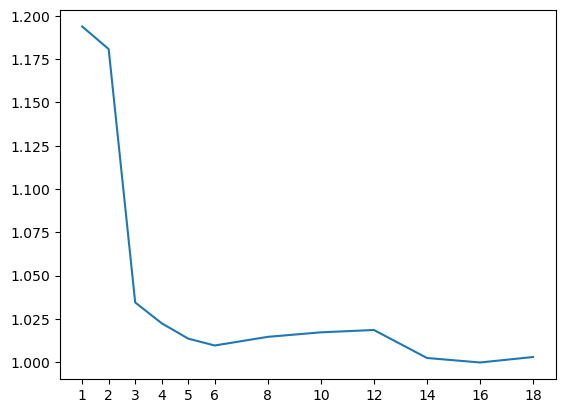

In [231]:
# plot rsme
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,6,8,10,12,14, 16,18], rsme)
plt.xticks([1,2,3,4,5,6,8,10,12,14, 16,18])

### 2 Stage Model

In [ ]:
models = buildfunctions(X_train_df, y_trainxgb2, conditionsT1b, n = 5, featlist = shap_list)
p = predfunctiontree(X_test_df, models, conditionsT1b, n = 5, featlist = shap_list)
eval_bins(p, y_testxgb2, y_test)

Bin: [0, 9e-05]      RMSE: 0.763, Avg. Error: 0.071
Bin: [9e-05, 1]      RMSE: 1.456, Avg. Error: 0.277
Bin: [1, 10]         RMSE: 3.921, Avg. Error: -0.531
Bin: [10, 50]        RMSE: 6.677, Avg. Error: -2.136
Bin: [50, 100]       RMSE: 8.474, Avg. Error: -3.626
Total RSME 1.6092785599811923
Total Avg. Error 0.018426792746315288


[[[0, 9e-05],
  0.5828452654256452,
  0.7634430335170039,
  0.3500421369385037,
  0.07113462413223914],
 [[9e-05, 1],
  2.11859300781864,
  1.4555387345648483,
  0.7365673225825862,
  0.2770641799427499],
 [[1, 10],
  15.374281840055016,
  3.921005207858696,
  1.981283944620427,
  -0.5306879126311715],
 [[10, 50],
  44.58116649610108,
  6.676912946572022,
  4.591008202854165,
  -2.1360531489125516],
 [[50, 100],
  71.80468799732424,
  8.473764688574036,
  6.914709148250813,
  -3.6259848798854017]]

### Actual y values 

In [ ]:
models = buildfunctions(X_train_df, y_train, conditionsT1b, n = 5, featlist = shap_list)
p = predfunctiontree(X_test_df, models, conditionsT1b, n = 5, featlist = shap_list)

In [ ]:
eval_bins(p, y_test, y_test)

Bin: [0, 9e-05]      RMSE: 1.150, Avg. Error: 0.216
Bin: [9e-05, 1]      RMSE: 2.136, Avg. Error: 0.840
Bin: [1, 10]         RMSE: 4.916, Avg. Error: -0.323
Bin: [10, 50]        RMSE: 15.229, Avg. Error: -8.618
Bin: [50, 100]       RMSE: 44.745, Avg. Error: -37.709
Total RSME 3.6170697662574494
Total Avg. Error 0.004221848150963163


[[[0, 9e-05],
  1.3235138163784885,
  1.1504407052858,
  0.3598368599933993,
  0.21574089362445245],
 [[9e-05, 1],
  4.56177133502017,
  2.1358303619482917,
  0.9091186933361268,
  0.8404822521436032],
 [[1, 10],
  24.168659514052774,
  4.916163088634548,
  3.1956346691116297,
  -0.3229530283475481],
 [[10, 50],
  231.91960787115798,
  15.22890698215594,
  12.351943161054196,
  -8.618229644417944],
 [[50, 100],
  2002.134345765604,
  44.74521589807791,
  37.70868384914587,
  -37.70868384914587]]

In [ ]:
# Performance original XGBoost
eval_bins(y_testxgb, y_test, y_test)

Bin: [0, 9e-05]      RMSE: 1.114, MAE: 0.221
Bin: [9e-05, 1]      RMSE: 2.083, MAE: 0.852
Bin: [1, 10]         RMSE: 4.737, MAE: 2.936
Bin: [10, 50]        RMSE: 14.318, MAE: 11.454
Bin: [50, 1000]      RMSE: 42.467, MAE: 36.253
Total RSME 3.437722289829286


[[[0, 9e-05], 1.2404707237167598, 1.1137642136990935, 0.22076951470743894],
 [[9e-05, 1], 4.3388958297606, 2.0830016394042037, 0.8516535821874164],
 [[1, 10], 22.442655449687813, 4.737367987573671, 2.935704337863973],
 [[10, 50], 205.00001285545153, 14.317821512208187, 11.45426664728321],
 [[50, 1000], 1803.4574301225628, 42.467133528442474, 36.25259661485339]]

## Approach 2 - windspeed + track_distance

In [ ]:
conditionsT2 = {1: {"wind_speed": 2.9, "track_distance": -1}, 
                2: {"wind_speed": 2.9, "track_distance": 5}, 
                3: {"wind_speed": 5, "track_distance": -1.3}, 
                4: {"wind_speed": 5, "track_distance": 5}, 
                }	

In [ ]:
models3 = buildfunctions(X_train_df, y_trainxgb_df, conditionsT2)
p = predfunctiontree(X_test_df, models3, conditionsT2)
y_test_df["FunctionTree_App2"]  = p

In [ ]:
mse = mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree_App2'])
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

MSE:  1.587551304966914
RMSE:  1.2599806764259975


In [ ]:
models3 = buildfunctions(X_train_df, y_trainxgb_df, conditionsT2, n = 5, featlist = shap_list)
p = predfunctiontree(X_test_df, models3, conditionsT2, n = 5, featlist = shap_list)
y_test_df["FunctionTree_App2"]  = p

In [ ]:
mse = mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree_App2'])
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

MSE:  1.5527299947673852
RMSE:  1.2460858697406794


In [ ]:
eval_bins(p, y_testxgb, y_test)

Bin: [0, 9e-05]      RMSE: 0.547, Avg. Error: 0.012
Bin: [9e-05, 1]      RMSE: 1.088, Avg. Error: 0.275
Bin: [1, 10]         RMSE: 2.582, Avg. Error: -0.080
Bin: [10, 50]        RMSE: 5.372, Avg. Error: -1.658
Bin: [50, 100]       RMSE: 9.595, Avg. Error: -3.284
Total RSME 1.2460858697406794
Total Avg. Error 0.005206688542191327


[[[0, 9e-05],
  0.29921316095591677,
  0.5470038034199732,
  0.22134436266748111,
  0.012481444187702778],
 [[9e-05, 1],
  1.184621016607758,
  1.0884029660965455,
  0.5750659974355229,
  0.2746444801900232],
 [[1, 10],
  6.665833478854962,
  2.5818275463041607,
  1.349258028633031,
  -0.07973267680431415],
 [[10, 50],
  28.86261519794533,
  5.3723938051808275,
  3.6472140134211135,
  -1.6583376990580734],
 [[50, 100],
  92.07007892503007,
  9.595315467718093,
  7.028041463279995,
  -3.284424187448329]]

In [ ]:
LRweights = pd.DataFrame(columns = ['Model 1', "Model 2"], index = shap_list[:5])
LRweights['Model 1'] = models3[1].coef_[0]
LRweights["Model 2"] = models3[2].coef_[0]
LRweights["Model 3"] = models3[3].coef_[0]
LRweights["Model 4"] = models3[4].coef_[0]
LRweights


Model 1   Model 2    Model 3    Model 4
wind_speed                     1.529030  0.235368  28.057104  20.876721
track_distance                -1.451591  0.052305 -19.541077   1.520080
rainfall_max_6h                0.596204  0.051849   2.763407   0.928126
percent_houses_damaged_5years  0.528954  0.011071   4.348546  -0.436315
rainfall_max_24h               0.246849  0.046774  -6.302671  -5.593183

### Actual y values

In [ ]:
models3 = buildfunctions(X_train_df, y_train, conditionsT2, n=5, featlist = shap_list)
p = predfunctiontree(X_test_df, models3, conditionsT2, n=5, featlist = shap_list)
eval_bins(p, y_test, y_test)

Bin:  [0, 9e-05]  RMSE:  1.2118588817191263
Bin:  [9e-05, 1]  RMSE:  2.2656969927658883
Bin:  [1, 10]  RMSE:  4.562105102088948
Bin:  [10, 50]  RMSE:  15.792126596197493
Bin:  [50, 1000]  RMSE:  44.37330740973127
Total RSME 3.651846468305194


[[[0, 9e-05], 1.4686019492015314, 1.2118588817191263],
 [[9e-05, 1], 5.133382863028389, 2.2656969927658883],
 [[1, 10], 20.812802962506005, 4.562105102088948],
 [[10, 50], 249.39126243032823, 15.792126596197493],
 [[50, 1000], 1968.990410478512, 44.37330740973127]]

## Approach 3: Rainfall

In [173]:
conditionsT3 = {1: {"wind_speed": 2.9, "track_distance": -1}, 
                2: {"wind_speed": 2.9, "track_distance": 5} , 
                3: {"wind_speed": 5, "track_distance": -1.3, "rainfall_max_6h": 0.5}, 
                4: {"wind_speed": 5, "track_distance": 5, "rainfall_max_6h": 0.5},
                5: {"wind_speed": 5, "track_distance": -1.3, "rainfall_max_6h": 5}, 
                6: {"wind_speed": 5, "track_distance": 5, "rainfall_max_6h": 5},  
                }	

In [175]:
models3 = buildfunctions(X_train_df, y_trainxgb_df, conditionsT3)
p = predfunctiontree(X_test_df, models3, conditionsT3)
eval_bins(p, y_testxgb, y_test)

Bin: [0, 9e-05]      RMSE: 0.557, Avg. Error: 0.011
Bin: [9e-05, 1]      RMSE: 1.013, Avg. Error: 0.239
Bin: [1, 10]         RMSE: 2.681, Avg. Error: 0.028
Bin: [10, 50]        RMSE: 5.466, Avg. Error: -1.829
Bin: [50, 100]       RMSE: 11.106, Avg. Error: -1.397
Total RSME 1.2942988513289844
Total Avg. Error 0.007101146972883577


[[[0, 9e-05],
  0.31043265834777256,
  0.5571648394755115,
  0.22163696614648898,
  0.011456449203648777],
 [[9e-05, 1],
  1.0260508652813736,
  1.0129416889838099,
  0.5388421078793919,
  0.23911221630864904],
 [[1, 10],
  7.189464480158756,
  2.6813176760985926,
  1.3754593178253736,
  0.028395000714467194],
 [[10, 50],
  29.872381644418095,
  5.465563250426994,
  3.576726259240375,
  -1.8293649345831067],
 [[50, 100],
  123.34933538269424,
  11.106274595141894,
  8.204421764966453,
  -1.3969646807704061]]

In [ ]:
models3 = buildfunctions(X_train_df, y_train, conditionsT3)
p = predfunctiontree(X_test_df, models3, conditionsT3)
eval_bins(p, y_test, y_test)

Bin:  [0, 9e-05]  RMSE:  1.2078416167011596
Bin:  [9e-05, 1]  RMSE:  2.0413542166725875
Bin:  [1, 10]  RMSE:  5.06318003595914
Bin:  [10, 50]  RMSE:  16.799502786918136
Bin:  [50, 1000]  RMSE:  44.09169294682471
Total RSME 3.7380263058448095


[[[0, 9e-05], 1.4588813710352708, 1.2078416167011596],
 [[9e-05, 1], 4.167127037926953, 2.0413542166725875],
 [[1, 10], 25.635792076535196, 5.06318003595914],
 [[10, 50], 282.22329388767025, 16.799502786918136],
 [[50, 1000], 1944.0773869170719, 44.09169294682471]]

## Manual tests along percentiles

### all possible combinations
 not feasible

In [7]:
# save wind_speed percentiles in 5% steps in list
percentiles = []
for i in range(1, 21):
    percentiles.append(np.percentile(X_train_df['wind_speed'], i*5))

# # create conditions for each percentile
# conditions = {}
# for i, p in enumerate(percentiles):
#     conditions[i] = {"wind_speed": p}
# conditions

# grid search of all combinations of 4 percentiles
from itertools import combinations
comb = combinations(range(20), 3)
comb = list(comb)
comb


[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 1, 10),
 (0, 1, 11),
 (0, 1, 12),
 (0, 1, 13),
 (0, 1, 14),
 (0, 1, 15),
 (0, 1, 16),
 (0, 1, 17),
 (0, 1, 18),
 (0, 1, 19),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 2, 10),
 (0, 2, 11),
 (0, 2, 12),
 (0, 2, 13),
 (0, 2, 14),
 (0, 2, 15),
 (0, 2, 16),
 (0, 2, 17),
 (0, 2, 18),
 (0, 2, 19),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 3, 10),
 (0, 3, 11),
 (0, 3, 12),
 (0, 3, 13),
 (0, 3, 14),
 (0, 3, 15),
 (0, 3, 16),
 (0, 3, 17),
 (0, 3, 18),
 (0, 3, 19),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 4, 10),
 (0, 4, 11),
 (0, 4, 12),
 (0, 4, 13),
 (0, 4, 14),
 (0, 4, 15),
 (0, 4, 16),
 (0, 4, 17),
 (0, 4, 18),
 (0, 4, 19),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 5, 10),
 (0, 5, 11),
 (0, 5, 12),
 (0, 5, 13),
 (0, 5, 14),
 (0, 5, 15),
 (0, 5, 16),
 (0, 5, 17),
 (0, 5, 18),
 (0

In [259]:
# evaluate all combinations
rsme = []
for c in comb:
    conditions = {}
    for i in c:
        conditions[i] = {"wind_speed": percentiles[i]}
    conditions[20] = {"wind_speed": 5}
    #print(conditions)
    models = buildfunctions(X_train_df, y_trainxgb_df, conditions)
    try:
        p = predfunctiontree(X_test_df, models, conditions)
        mse = mean_squared_error(y_testxgb, p)
        rsme.append(np.sqrt(mse))
        print("Condition: ", conditions, " RSME: ", np.sqrt(mse))
    except:
        print("Condition: ", conditions, " failed")

Condition:  {0: {'wind_speed': -1.1187358365711937}, 1: {'wind_speed': -0.9739805623061351}, 2: {'wind_speed': -0.8764615939940964}, 20: {'wind_speed': 5}}  RSME:  2.9688403059782353
Condition:  {0: {'wind_speed': -1.1187358365711937}, 1: {'wind_speed': -0.9739805623061351}, 3: {'wind_speed': -0.787827568554495}, 20: {'wind_speed': 5}}  RSME:  2.951543747917696
Condition:  {0: {'wind_speed': -1.1187358365711937}, 1: {'wind_speed': -0.9739805623061351}, 4: {'wind_speed': -0.7056763508558689}, 20: {'wind_speed': 5}}  RSME:  2.93413710261968
Condition:  {0: {'wind_speed': -1.1187358365711937}, 1: {'wind_speed': -0.9739805623061351}, 5: {'wind_speed': -0.6277290278014406}, 20: {'wind_speed': 5}}  RSME:  2.912391447642606
Condition:  {0: {'wind_speed': -1.1187358365711937}, 1: {'wind_speed': -0.9739805623061351}, 6: {'wind_speed': -0.5516438215927026}, 20: {'wind_speed': 5}}  RSME:  2.886596236154124
Condition:  {0: {'wind_speed': -1.1187358365711937}, 1: {'wind_speed': -0.9739805623061351}

### iterative approach

In [13]:
# best 1 split 
comb = range(20)
# save wind_speed percentiles in 5% steps in list
percentiles = []
for i in range(1, 21):
    percentiles.append(np.percentile(X_train_df['wind_speed'], i*5))


# evaluate all combinations
rsme = []
for c in comb:
    conditions = {}
    conditions[c] = {"wind_speed": percentiles[c]}
    # for i in c:
    #     conditions[i] = {"wind_speed": percentiles[i]}
    conditions[20] = {"wind_speed": 5}
    #print(conditions)
    models = buildfunctions(X_train_df, y_trainxgb_df, conditions)
    try:
        p = predfunctiontree(X_train_df, models, conditions)
        mse = mean_squared_error(y_trainxgb, p)
        rsme.append(np.sqrt(mse))
        print("Condition: ", conditions, " RSME: ", np.sqrt(mse))
    except:
        print("Condition: ", conditions, " failed")

# best threshold: 95% percentile - 2.0728

Condition:  {0: {'wind_speed': -1.1187358365711937}, 20: {'wind_speed': 5}}  RSME:  3.0123826742276516
Condition:  {1: {'wind_speed': -0.9739805623061351}, 20: {'wind_speed': 5}}  RSME:  2.9886003323907233
Condition:  {2: {'wind_speed': -0.8764615939940964}, 20: {'wind_speed': 5}}  RSME:  2.9688365709315048
Condition:  {3: {'wind_speed': -0.787827568554495}, 20: {'wind_speed': 5}}  RSME:  2.9515529121670045
Condition:  {4: {'wind_speed': -0.7056763508558689}, 20: {'wind_speed': 5}}  RSME:  2.9341513930856067
Condition:  {5: {'wind_speed': -0.6277290278014406}, 20: {'wind_speed': 5}}  RSME:  2.9124103670802364
Condition:  {6: {'wind_speed': -0.5516438215927026}, 20: {'wind_speed': 5}}  RSME:  2.8866121061495122
Condition:  {7: {'wind_speed': -0.47567030928335524}, 20: {'wind_speed': 5}}  RSME:  2.8584933497790286
Condition:  {8: {'wind_speed': -0.39404924026758414}, 20: {'wind_speed': 5}}  RSME:  2.821584604643805
Condition:  {9: {'wind_speed': -0.30672047800650276}, 20: {'wind_speed': 

In [14]:
percentiles_90 = []
for i in range(90, 100):
    percentiles_90.append(np.percentile(X_train_df['wind_speed'], i))

rsme = []
for i, c in enumerate(range(90, 100)):
    conditions = {}
    conditions[c] = {"wind_speed": percentiles_90[i]}
    # for i in c:
    #     conditions[i] = {"wind_speed": percentiles[i]}
    conditions[20] = {"wind_speed": 5}
    #print(conditions)
    models = buildfunctions(X_train_df, y_trainxgb_df, conditions)
    try:
        p = predfunctiontree(X_train_df, models, conditions)
        mse = mean_squared_error(y_trainxgb, p)
        rsme.append(np.sqrt(mse))
        print("Condition: ", conditions, " RSME: ", np.sqrt(mse))
    except:
        print("Condition: ", conditions, " failed")

# best threshold: 97th percentile, 2.4431

Condition:  {90: {'wind_speed': 1.5399105541229128}, 20: {'wind_speed': 5}}  RSME:  1.858738392984894
Condition:  {91: {'wind_speed': 1.6323598456058896}, 20: {'wind_speed': 5}}  RSME:  1.792698713761036
Condition:  {92: {'wind_speed': 1.731017625490576}, 20: {'wind_speed': 5}}  RSME:  1.723554393751371
Condition:  {93: {'wind_speed': 1.828127950586254}, 20: {'wind_speed': 5}}  RSME:  1.6555807830510347
Condition:  {94: {'wind_speed': 1.9425934321007994}, 20: {'wind_speed': 5}}  RSME:  1.5815032268014766
Condition:  {95: {'wind_speed': 2.0727974531463653}, 20: {'wind_speed': 5}}  RSME:  1.5079113786773573
Condition:  {96: {'wind_speed': 2.2414365006859343}, 20: {'wind_speed': 5}}  RSME:  1.4457601299593856
Condition:  {97: {'wind_speed': 2.443195022211083}, 20: {'wind_speed': 5}}  RSME:  1.4307578007540793
Condition:  {98: {'wind_speed': 2.66624056155341}, 20: {'wind_speed': 5}}  RSME:  1.4879886706548247
Condition:  {99: {'wind_speed': 3.063995186365151}, 20: {'wind_speed': 5}}  RSME:

In [28]:
r = np.arange(96, 98, 0.2).round(2).tolist()
r

[96.0, 96.2, 96.4, 96.6, 96.8, 97.0, 97.2, 97.4, 97.6, 97.8]

In [34]:
percentiles_97 = []
r = np.arange(96, 98, 0.2).round(2).tolist()
for i in r:
    percentiles_97.append(np.percentile(X_train_df['wind_speed'], i))

rsme = []
for i in range(len(percentiles_97)):
    conditions = {}
    conditions[r[i]] = {"wind_speed": percentiles_97[i]}
    # for i in c:
    #     conditions[i] = {"wind_speed": percentiles[i]}
    conditions[20] = {"wind_speed": 5}
    #print(conditions)
    models = buildfunctions(X_train_df, y_trainxgb_df, conditions)
    try:
        p = predfunctiontree(X_train_df, models, conditions)
        mse = mean_squared_error(y_trainxgb, p)
        rsme.append(np.sqrt(mse))
        print("Condition: ", conditions, " RSME: ", np.sqrt(mse))
    except:
        print("Condition: ", conditions, " failed")

# best threshold: 96.8th percentile - 2.408

Condition:  {96.0: {'wind_speed': 2.2414365006859343}, 20: {'wind_speed': 5}}  RSME:  1.4457601299593856
Condition:  {96.2: {'wind_speed': 2.285081536293375}, 20: {'wind_speed': 5}}  RSME:  1.4365142566009026
Condition:  {96.4: {'wind_speed': 2.322170748579849}, 20: {'wind_speed': 5}}  RSME:  1.4296703403985087
Condition:  {96.6: {'wind_speed': 2.3642525592062253}, 20: {'wind_speed': 5}}  RSME:  1.4256441747814614
Condition:  {96.8: {'wind_speed': 2.4081322049158786}, 20: {'wind_speed': 5}}  RSME:  1.4267094744735302
Condition:  {97.0: {'wind_speed': 2.443195022211083}, 20: {'wind_speed': 5}}  RSME:  1.4307578007540793
Condition:  {97.2: {'wind_speed': 2.4860710605049796}, 20: {'wind_speed': 5}}  RSME:  1.438327416373418
Condition:  {97.4: {'wind_speed': 2.5284003007976272}, 20: {'wind_speed': 5}}  RSME:  1.449480655283671
Condition:  {97.6: {'wind_speed': 2.5728167695630724}, 20: {'wind_speed': 5}}  RSME:  1.461526459756397
Condition:  {97.8: {'wind_speed': 2.621621928478894}, 20: {'w

In [37]:
percentiles = []
for i in range(1, 100):
    percentiles.append(np.percentile(X_train_df['wind_speed'], i))

In [39]:
# search for next best split

for i in range(1, 10):
    conditions ={}
    conditions[1] = {"wind_speed": percentiles[i*10]}
    conditions[2] = {"wind_speed": 2.408}
    conditions[4] = {"wind_speed": 5}
    models = buildfunctions(X_train_df, y_trainxgb_df, conditions)
    p = predfunctiontree(X_train_df, models, conditions)
    mse = mean_squared_error(y_trainxgb, p)
    print("Condition: ", conditions, " RSME: ", np.sqrt(mse))

# 80th percentile 

Condition:  {1: {'wind_speed': -0.9523635953080024}, 2: {'wind_speed': 2.408}, 4: {'wind_speed': 5}}  RSME:  1.4193827416156313
Condition:  {1: {'wind_speed': -0.7703360999502238}, 2: {'wind_speed': 2.408}, 4: {'wind_speed': 5}}  RSME:  1.4140715995674498
Condition:  {1: {'wind_speed': -0.6127296464745643}, 2: {'wind_speed': 2.408}, 4: {'wind_speed': 5}}  RSME:  1.4084280868895274
Condition:  {1: {'wind_speed': -0.4587458387808679}, 2: {'wind_speed': 2.408}, 4: {'wind_speed': 5}}  RSME:  1.4016968213109737
Condition:  {1: {'wind_speed': -0.28602905178587457}, 2: {'wind_speed': 2.408}, 4: {'wind_speed': 5}}  RSME:  1.39311069212703
Condition:  {1: {'wind_speed': -0.05291093599945915}, 2: {'wind_speed': 2.408}, 4: {'wind_speed': 5}}  RSME:  1.3819424382537129
Condition:  {1: {'wind_speed': 0.2758592504890555}, 2: {'wind_speed': 2.408}, 4: {'wind_speed': 5}}  RSME:  1.368218987152945
Condition:  {1: {'wind_speed': 0.7948343704543974}, 2: {'wind_speed': 2.408}, 4: {'wind_speed': 5}}  RSME:

In [34]:
r = np.arange(76, 85, 2).round(2).tolist()

for i in r:
    conditions ={}
    conditions[1] = {"wind_speed": np.percentile(X_train_df['wind_speed'], i)}
    conditions[2] = {"wind_speed": 2.41}
    conditions[4] = {"wind_speed": 5}
    models = buildfunctions(X_train_df, y_trainxgb_df, conditions)
    p = predfunctiontree(X_train_df, models, conditions)
    mse = mean_squared_error(y_trainxgb, p)
    print("Condition: ", conditions, " RSME: ", np.sqrt(mse))

# 84th percentile 1.004974426831655

Condition:  {1: {'wind_speed': 0.5004647536212309}, 2: {'wind_speed': 2.41}, 4: {'wind_speed': 5}}  RSME:  1.3591525785482481
Condition:  {1: {'wind_speed': 0.6147005044613717}, 2: {'wind_speed': 2.41}, 4: {'wind_speed': 5}}  RSME:  1.3562344222381957
Condition:  {1: {'wind_speed': 0.7295963497557665}, 2: {'wind_speed': 2.41}, 4: {'wind_speed': 5}}  RSME:  1.3521870015979047
Condition:  {1: {'wind_speed': 0.8635807528706761}, 2: {'wind_speed': 2.41}, 4: {'wind_speed': 5}}  RSME:  1.35209274009279
Condition:  {1: {'wind_speed': 1.004974426831655}, 2: {'wind_speed': 2.41}, 4: {'wind_speed': 5}}  RSME:  1.3515590107324809


In [37]:
r = np.arange(97, 100, 0.5).round(2).tolist()

for i in r:
    conditions ={}
    conditions[1] = {"wind_speed": 1.01}
    conditions[2] = {"wind_speed": 2.41}
    conditions[3] = {"wind_speed": np.percentile(X_train_df['wind_speed'], i)}
    conditions[4] = {"wind_speed": 5}
    models = buildfunctions(X_train_df, y_trainxgb_df, conditions)
    p = predfunctiontree(X_train_df, models, conditions)
    mse = mean_squared_error(y_trainxgb, p)
    print("Condition: ", conditions, " RSME: ", np.sqrt(mse))

# 99.5th percentile 3.4541588032035317

Condition:  {1: {'wind_speed': 1.01}, 2: {'wind_speed': 2.41}, 3: {'wind_speed': 2.443195022211083}, 4: {'wind_speed': 5}}  RSME:  1.341755983043133
Condition:  {1: {'wind_speed': 1.01}, 2: {'wind_speed': 2.41}, 3: {'wind_speed': 2.54987952851569}, 4: {'wind_speed': 5}}  RSME:  1.3154483619667416
Condition:  {1: {'wind_speed': 1.01}, 2: {'wind_speed': 2.41}, 3: {'wind_speed': 2.66624056155341}, 4: {'wind_speed': 5}}  RSME:  1.278291561698336
Condition:  {1: {'wind_speed': 1.01}, 2: {'wind_speed': 2.41}, 3: {'wind_speed': 2.808103184150805}, 4: {'wind_speed': 5}}  RSME:  1.2423737132375703
Condition:  {1: {'wind_speed': 1.01}, 2: {'wind_speed': 2.41}, 3: {'wind_speed': 3.063995186365151}, 4: {'wind_speed': 5}}  RSME:  1.1689717317821522
Condition:  {1: {'wind_speed': 1.01}, 2: {'wind_speed': 2.41}, 3: {'wind_speed': 3.4541588032035317}, 4: {'wind_speed': 5}}  RSME:  1.167149140869403


In [44]:
# best model

conditions ={}
conditions[1] = {"wind_speed": 1.01}
conditions[2] = {"wind_speed": 2.41}
conditions[3] = {"wind_speed": 3.06}
conditions[4] = {"wind_speed": 5}

models = buildfunctions(X_train_df, y_trainxgb_df, conditions)
p = predfunctiontree(X_test_df, models, conditions)
mse = mean_squared_error(y_testxgb, p)
eval_bins(p, y_testxgb, y_test)[0]

Bin: [0, 9e-05]      RMSE: 0.417, Avg. Error: 0.009
Bin: [9e-05, 1]      RMSE: 0.650, Avg. Error: 0.075
Bin: [1, 10]         RMSE: 2.322, Avg. Error: -0.015
Bin: [10, 50]        RMSE: 4.206, Avg. Error: -0.497
Bin: [50, 100]       RMSE: 9.121, Avg. Error: -3.936
Total RSME 1.022273426702261
Total Avg. Error -0.003434642396741035


[[0, 9e-05],
 0.17366177058034815,
 0.41672745359569024,
 0.13994168332901868,
 0.009091528534463522]

In [46]:
# add wind_speed^4

conditions ={}
conditions[1] = {"wind_speed": 1.01}
conditions[2] = {"wind_speed": 2.41}
conditions[3] = {"wind_speed": 3.06}
conditions[4] = {"wind_speed": 5}

models_2 = buildfunctions(X_train_pwr, y_trainxgb_df, conditions, n = 19, featlist = X_train_pwr.columns)
p = predfunctiontree(X_test_pwr, models_2, conditions, n = 19, featlist = X_train_pwr.columns)
eval_bins(p, y_testxgb, y_test)[0]

Bin: [0, 9e-05]      RMSE: 0.428, Avg. Error: 0.007
Bin: [9e-05, 1]      RMSE: 0.603, Avg. Error: 0.066
Bin: [1, 10]         RMSE: 2.226, Avg. Error: 0.012
Bin: [10, 50]        RMSE: 3.796, Avg. Error: -0.410
Bin: [50, 100]       RMSE: 7.589, Avg. Error: -3.385
Total RSME 0.9412124810308711
Total Avg. Error -0.001601759938082695


[[0, 9e-05],
 0.18343459366877138,
 0.4282926495619221,
 0.13712335095456435,
 0.007311884992719606]

In [52]:
X_train_pwr.columns

Index(['wind_speed', 'track_distance', 'total_houses', 'rainfall_max_6h',
       'rainfall_max_24h', 'rwi', 'mean_slope', 'std_slope', 'mean_tri',
       'std_tri', 'mean_elev', 'coast_length', 'with_coast', 'urban', 'rural',
       'water', 'total_pop', 'percent_houses_damaged_5years', 'ws_pwr'],
      dtype='object')

In [61]:
from featurelists import shap_list

conditions ={}
conditions[1] = {"wind_speed": 1.01}
conditions[2] = {"wind_speed": 2.41}
conditions[3] = {"wind_speed": 3.06}
conditions[4] = {"wind_speed": 5}

# reduce n 
n = 5
# add ws_pwr to shaplist
featlist = ["ws_pwr"]+shap_list[:n]

models = buildfunctions(X_train_pwr, y_trainxgb_df, conditions, n = n+1, featlist = featlist)
p = predfunctiontree(X_test_pwr, models, conditions, n = n+1, featlist = featlist)

eval_bins(p, y_testxgb, y_test)[0]

Bin: [0, 9e-05]      RMSE: 0.442, Avg. Error: 0.007
Bin: [9e-05, 1]      RMSE: 0.705, Avg. Error: 0.099
Bin: [1, 10]         RMSE: 2.225, Avg. Error: -0.066
Bin: [10, 50]        RMSE: 3.964, Avg. Error: -0.494
Bin: [50, 100]       RMSE: 7.437, Avg. Error: -3.287
Total RSME 0.9652557288203328
Total Avg. Error -0.002465675624842972


[[0, 9e-05],
 0.1949579971322742,
 0.4415404818725846,
 0.1382140271620199,
 0.00682130398457891]

In [57]:
LRweights = pd.DataFrame(columns = ['Model 1', "Model 2"], index = featlist[:n+1])

LRweights['Model 1'] = models[1].coef_[0]
LRweights["Model 2"] = models[2].coef_[0]
LRweights["Model 3"] = models[3].coef_[0]
LRweights["Model 4"] = models[4].coef_[0]
# add row with intercepts
LRweights.loc['Intercept'] = [models[1].intercept_[0], models[2].intercept_[0], models[3].intercept_[0], models[4].intercept_[0]]
LRweights.loc['Windspeed Threshold'] = [conditions[1]["wind_speed"], conditions[2]["wind_speed"], conditions[3]["wind_speed"], conditions[4]["wind_speed"]]

LRweights

Model 1   Model 2     Model 3     Model 4
ws_pwr                         0.055148  0.072602    1.283353    0.494130
wind_speed                     0.076536  0.931856  -79.977446  -63.788297
track_distance                -0.065508 -0.614941    2.146481  -19.034315
rainfall_max_6h                0.075219  0.346078    3.544456    1.430819
percent_houses_damaged_5years  0.011510  1.012006    2.242090    0.369816
rainfall_max_24h               0.050376  0.065248   -0.471092   -6.995297
Intercept                      0.147139 -1.290271  155.931934  151.458133
Windspeed Threshold            1.010000  2.410000    3.060000    5.000000

In [36]:
X_test_df["wind_speed"].max()

4.253275522151761

In [ ]:
eval_bins(y_test_df['FunctionTree2_n5+pwr'], y_test_df['y_testxgb'], y_test_df['percent_houses_damaged'])[0]

In [66]:
# compare to decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_trainxgb)
y_pred = dt.predict(X_test)
eval_bins(y_pred, y_testxgb, y_test)[0]

Bin: [0, 9e-05]      RMSE: 0.431, Avg. Error: 0.033
Bin: [9e-05, 1]      RMSE: 0.847, Avg. Error: 0.006
Bin: [1, 10]         RMSE: 2.182, Avg. Error: -0.018
Bin: [10, 50]        RMSE: 4.713, Avg. Error: -0.188
Bin: [50, 100]       RMSE: 4.990, Avg. Error: -0.816
Total RSME 0.9894080992647223
Total Avg. Error 0.01984912167204171


[[0, 9e-05],
 0.18568983973474112,
 0.43091743958064765,
 0.14062827857966254,
 0.032938633917835636]

## More EDA

MSE:  11.079128950142737
RMSE:  3.3285325520629563


[Text(0.5, 0.875, 'track_distance <= -1.302\nsquared_error = 15.126\nsamples = 39803\nvalue = 0.835'),
 Text(0.25, 0.625, 'rainfall_max_24h <= -0.03\nsquared_error = 94.027\nsamples = 4898\nvalue = 5.089'),
 Text(0.125, 0.375, 'water <= -1.459\nsquared_error = 44.159\nsamples = 1066\nvalue = 1.584'),
 Text(0.0625, 0.125, 'squared_error = 316.877\nsamples = 53\nvalue = 8.323'),
 Text(0.1875, 0.125, 'squared_error = 27.39\nsamples = 1013\nvalue = 1.232'),
 Text(0.375, 0.375, 'track_distance <= -1.425\nsquared_error = 103.532\nsamples = 3832\nvalue = 6.064'),
 Text(0.3125, 0.125, 'squared_error = 125.247\nsamples = 2710\nvalue = 6.916'),
 Text(0.4375, 0.125, 'squared_error = 45.103\nsamples = 1122\nvalue = 4.007'),
 Text(0.75, 0.625, 'track_distance <= -1.029\nsquared_error = 1.158\nsamples = 34905\nvalue = 0.238'),
 Text(0.625, 0.375, 'rainfall_max_6h <= 2.754\nsquared_error = 9.481\nsamples = 3150\nvalue = 1.627'),
 Text(0.5625, 0.125, 'squared_error = 8.122\nsamples = 3138\nvalue = 1.5

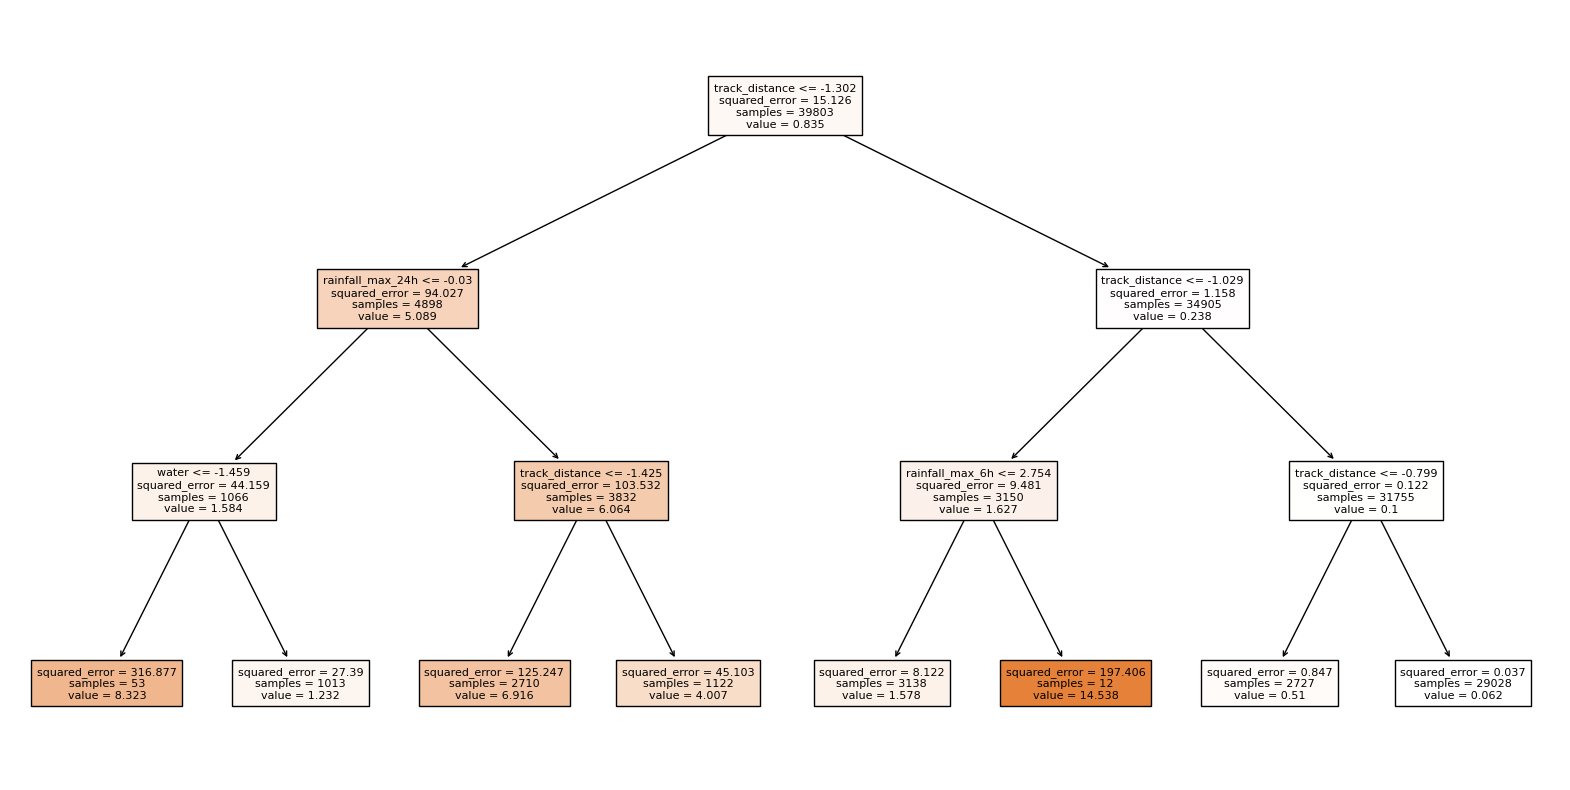

In [203]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train_df[shap_list[1:]], y_trainxgb)
y_pred = dt.predict(X_test_df[shap_list[1:]])
mse = mean_squared_error(y_testxgb, y_pred)

print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=features[1:], filled=True, fontsize=8)

# Cluster approach

## EDA: Clustering of LIME

In [16]:
# Global lime values
from lime.lime_tabular import LimeTabularExplainer

def LIME_global(X_train, X_test, y_train, features, model):
    explainer = LimeTabularExplainer(training_data=X_train, feature_names=features, class_names=y_train, verbose=True, mode='regression', discretize_continuous=False)
    lime_dict = {}
    for f in features:
        lime_dict[f] = []
    for i in range(len(X_test)):
        instance = X_test[i]
        explanation = explainer.explain_instance(instance, model.predict, num_features=len(features))
        explist = dict(explanation.as_list())
        for feature in explist.keys():
            # if feature not in lime_dict:
            #     lime_dict[feature] = []
            lime_dict[feature].append(explist[feature])
    lime_df = pd.DataFrame(lime_dict)
    return lime_df


In [17]:
from featurelists import shap_list, lime_list

In [18]:
model = Load_Model('xgb_model')
features = Load_Model('features')

In [19]:
lime_df = LIME_global(np.array(X_train), np.array(X_train), y_train, features, model) 
#21min

Intercept 0.48319597096454703
Prediction_local [-0.60972367]
Right: 0.0045049684
Intercept 0.4126935247597006
Prediction_local [-0.31212432]
Right: 0.06532536
Intercept 0.4280732511938433
Prediction_local [-0.28774746]
Right: 0.04559435
Intercept 0.40717997525480876
Prediction_local [1.75481862]
Right: 3.013477
Intercept 0.40934051300509655
Prediction_local [0.12406166]
Right: -0.028086368
Intercept 0.45201501131863936
Prediction_local [0.19647164]
Right: -0.0049315025
Intercept 0.4585850286173814
Prediction_local [1.03787446]
Right: 0.015443642
Intercept 0.45386932649656253
Prediction_local [0.1377551]
Right: 0.0374409
Intercept 0.4503705827676806
Prediction_local [0.50422763]
Right: 0.1842497
Intercept 0.4642296930797249
Prediction_local [-0.54084497]
Right: -0.009567074
Intercept 0.42450668147580406
Prediction_local [-0.61613071]
Right: -0.053582974
Intercept 0.44748308090428696
Prediction_local [0.67071311]
Right: 0.061949402
Intercept 0.4532676273233143
Prediction_local [2.4204869

In [20]:
# save lime_df into csv file
lime_df.to_csv("lime_df_train.csv")



Caching the list of root modules, please wait!
Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)


(This will only be done once - type '%rehashx' to reset cache!)



In [21]:
lime_df = pd.read_csv("lime_df_train.csv")
lime_df

Unnamed: 0  wind_speed  track_distance  total_houses  rainfall_max_6h  \
0               0    0.476549       -0.220270     -0.021365         0.079118   
1               1    0.422377       -0.190536     -0.029592         0.067412   
2               2    0.413892       -0.202031      0.006550         0.088754   
3               3    0.674359       -0.264053     -0.052959         0.080844   
4               4    0.390183       -0.301943     -0.038827         0.072741   
...           ...         ...             ...           ...              ...   
39798       39798    0.864313       -0.408274     -0.046661         0.131994   
39799       39799    0.796440       -0.261619      0.040527         0.078210   
39800       39800    0.455218       -0.209863     -0.045120         0.060312   
39801       39801    0.515615       -0.238679     -0.049075         0.100393   
39802       39802    0.524352       -0.316822     -0.042215         0.112411   

       rainfall_max_24h       rwi  mean_slope  std_slope  mean_tri   std_tri  \
0              0.043270 -0.169574   -0.003268  -0.017866  0.021360 -0.029729   
1              0.040576 -0.093444   -0.014907   0.025515  0.029565 -0.019593   
2              0.085044 -0.159377   -0.004095  -0.020243  0.011906 -0.048556   
3              0.063104 -0.095032   -0.049431   0.004330 -0.045569 -0.029351   
4              0.074784 -0.145657   -0.015950  -0.003829  0.012155 -0.024489   
...                 ...       ...         ...        ...       ...       ...   
39798          0.030564 -0.251728    0.000093   0.038004  0.001089  0.004760   
39799          0.037516 -0.244431   -0.029575  -0.069059 -0.035695  0.000249   
39800          0.062411 -0.187410    0.003576   0.022078  0.010287 -0.024608   
39801          0.074949 -0.253710    0.013368  -0.003871  0.009865 -0.037190   
39802          0.051219 -0.154040   -0.007233  -0.012136 -0.023366  0.007620   

       mean_elev  coast_length  with_coast     urban     rural     water  \
0       0.010737      0.018771   -0.005471 -0.016704 -0.000992  0.028822   
1       0.036167     -0.001487   -0.015364 -0.023233  0.027291  0.030885   
2       0.011547      0.041413    0.006882 -0.039648  0.033915  0.006683   
3       0.002349      0.048111   -0.029931 -0.009734  0.043817 -0.014022   
4       0.007580      0.034412    0.022486 -0.047807  0.015433  0.014231   
...          ...           ...         ...       ...       ...       ...   
39798  -0.037433      0.022843    0.010305 -0.060351  0.051662  0.010456   
39799  -0.009242      0.022509    0.013403 -0.020799  0.000888 -0.036685   
39800   0.041714      0.024477   -0.000103 -0.017759 -0.004315  0.010677   
39801  -0.000517      0.020662   -0.035017 -0.062826  0.029911 -0.010447   
39802   0.015638      0.013199    0.007436 -0.036838  0.036263 -0.008212   

       total_pop  percent_houses_damaged_5years  
0      -0.020851                       0.073164  
1      -0.023901                       0.060358  
2      -0.032611                       0.061550  
3      -0.060216                       0.153687  
4      -0.043162                       0.060041  
...          ...                            ...  
39798  -0.131509                       0.084780  
39799  -0.093658                       0.134955  
39800  -0.023681                       0.078009  
39801  -0.016094                       0.083566  
39802  -0.052951                       0.072225  

[39803 rows x 19 columns]

In [8]:
# unsupervised clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(lime_df)

# evaluate clusters
from sklearn.metrics import silhouette_score
silhouette_score(lime_df, kmeans.labels_)
print("Silhouette Score: ", silhouette_score(lime_df, kmeans.labels_))

#silhouette plot
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm



Silhouette Score:  0.24669014253809857


In [9]:
for n in range(2,10):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(lime_df)
    print(f"Silhouette Score n={n}: ", silhouette_score(lime_df, kmeans.labels_))

Silhouette Score n=2:  0.41587504477753356
Silhouette Score n=3:  0.24669014253809857
Silhouette Score n=4:  0.17519052266911622
Silhouette Score n=5:  0.1314542711847898
Silhouette Score n=6:  0.14406281112008212
Silhouette Score n=7:  0.13799092502236296
Silhouette Score n=8:  0.12396764497541793
Silhouette Score n=9:  0.11047687217982194


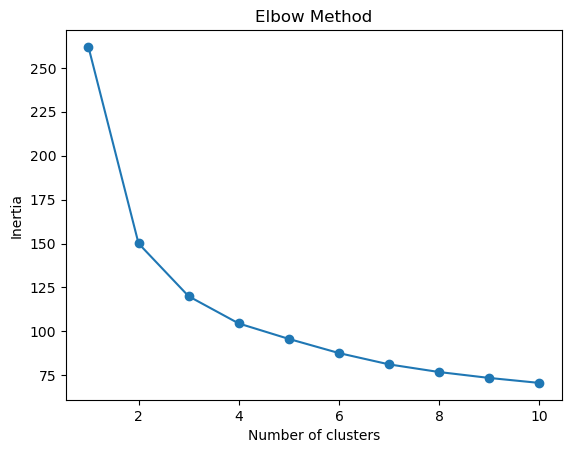

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42).fit(lime_df[lime_list[:10]])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [13]:
# add cluster number to x_train
kmeans = KMeans(n_clusters=5, random_state=0).fit(lime_df[lime_list[:7]])
X_train_df['cluster'] = kmeans.labels_

In [17]:
# build decision tree to predict cluster
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_df[features], X_train_df['cluster'])

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'wind_speed <= -0.312\ngini = 0.639\nsamples = 39803\nvalue = [17875, 14619, 1084, 6065, 160]'),
 Text(0.25, 0.625, 'track_distance <= 0.277\ngini = 0.355\nsamples = 19788\nvalue = [15256, 4437, 0, 8, 87]'),
 Text(0.125, 0.375, 'wind_speed <= -0.57\ngini = 0.501\nsamples = 5449\nvalue = [2996, 2417, 0, 5, 31]'),
 Text(0.0625, 0.125, 'gini = 0.42\nsamples = 2542\nvalue = [1793, 728, 0, 0, 21]'),
 Text(0.1875, 0.125, 'gini = 0.491\nsamples = 2907\nvalue = [1203, 1689, 0, 5, 10]'),
 Text(0.375, 0.375, 'wind_speed <= -0.589\ngini = 0.249\nsamples = 14339\nvalue = [12260, 2020, 0, 3, 56]'),
 Text(0.3125, 0.125, 'gini = 0.176\nsamples = 10593\nvalue = [9566, 987, 0, 0, 40]'),
 Text(0.4375, 0.125, 'gini = 0.407\nsamples = 3746\nvalue = [2694, 1033, 0, 3, 16]'),
 Text(0.75, 0.625, 'wind_speed <= 0.876\ngini = 0.63\nsamples = 20015\nvalue = [2619, 10182, 1084, 6057, 73]'),
 Text(0.625, 0.375, 'track_distance <= 0.018\ngini = 0.466\nsamples = 12920\nvalue = [2597, 8986, 0, 1279

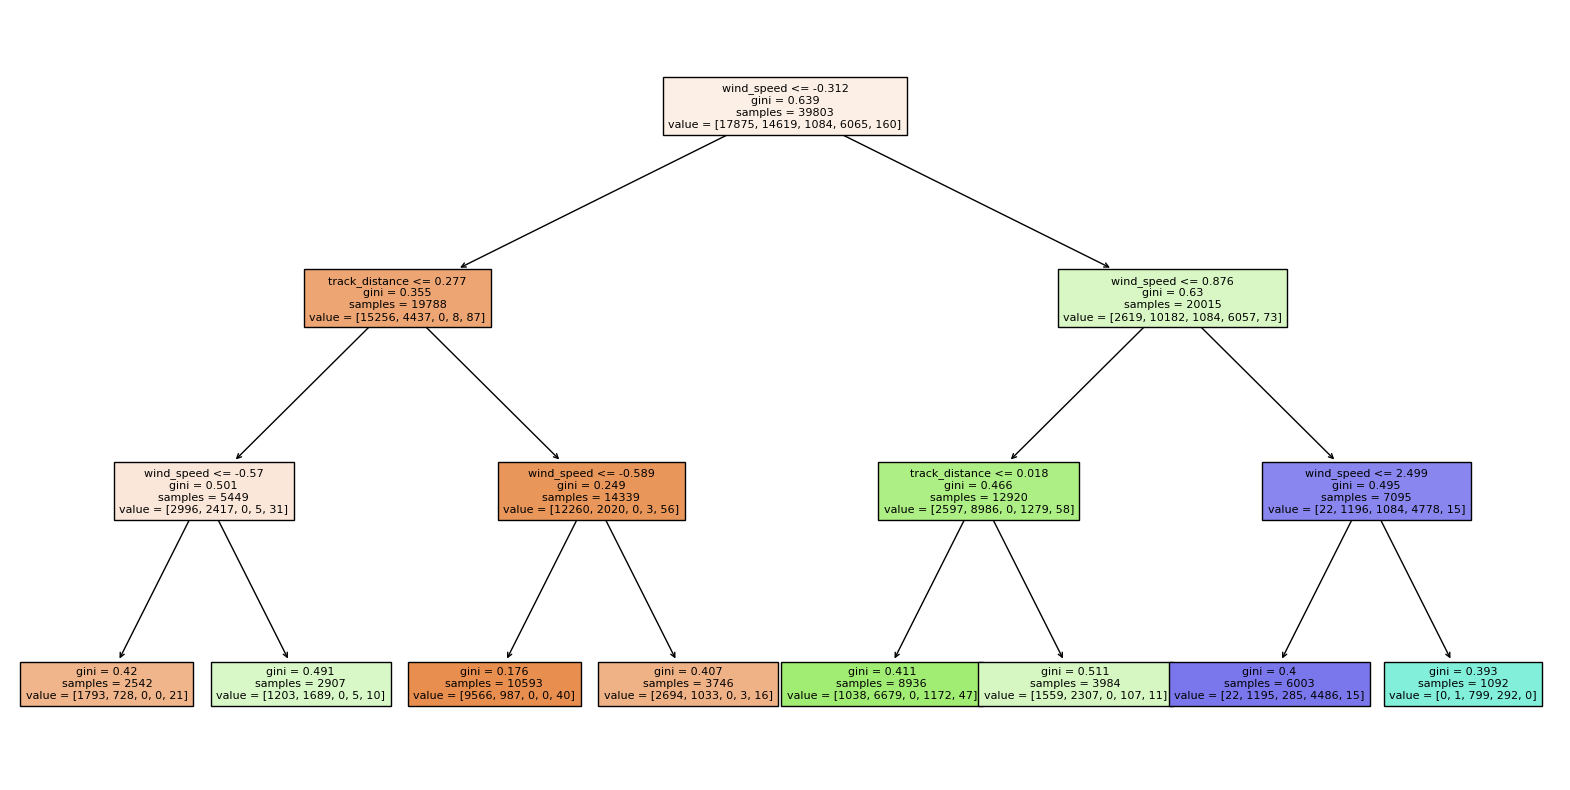

In [18]:
# show tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=features, filled=True, fontsize=8)

In [115]:
condClass =     {1: {"wind_speed": 0.312, "track_distance": 0.277}, 
                2: {"wind_speed": 0.312, "track_distance": 5} , 
                3: {"wind_speed": 0.876, "track_distance": 0.018}, 
                4: {"wind_speed": 2.499, "track_distance": 5},
                5: {"wind_speed": 5, "track_distance": 5}, 
                }	

In [110]:
y_trainxgb_df

0
0      0.004505
1      0.065325
2      0.045594
3      3.013477
4     -0.028086
...         ...
39798  6.100111
39799  1.261724
39800  0.018704
39801 -0.003242
39802 -0.345533

[39803 rows x 1 columns]

In [138]:
models = buildfunctions(X_train_df, y_trainxgb_df, condClass)
p = predfunctiontree(X_test_df, models, condClass)
y_test_df["FT_condclass"]  = p

In [140]:
eval_bins(p, y_testxgb, y_test)
# 5 models with 2 variable conditions - not comparable

Bin: [0, 9e-05]      RMSE: 0.450, Avg. Error: 0.007
Bin: [9e-05, 1]      RMSE: 0.810, Avg. Error: 0.120
Bin: [1, 10]         RMSE: 2.652, Avg. Error: 0.137
Bin: [10, 50]        RMSE: 5.588, Avg. Error: -0.571
Bin: [50, 100]       RMSE: 9.633, Avg. Error: -4.675
Total RSME 1.2105313759377576
Total Avg. Error 0.005514274160117092


[[[0, 9e-05],
  0.20293195348612408,
  0.4504796926456553,
  0.1304974935648775,
  0.0067296652169227264],
 [[9e-05, 1],
  0.6559136544161277,
  0.8098849636930715,
  0.3873564218540664,
  0.12000697979482258],
 [[1, 10],
  7.031025509295981,
  2.6516080987385715,
  1.1962681476279198,
  0.1373893140282089],
 [[10, 50],
  31.229417443190318,
  5.588328680669232,
  3.8155056544650408,
  -0.5709417518031505],
 [[50, 100],
  92.78880358999682,
  9.632694513478397,
  7.150200169371064,
  -4.6751268639395045]]

## Final cluster approach: LIME

In [22]:
# add cluster number to x_train
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from featurelists import shap_list, lime_list

lime_df = pd.read_csv("lime_df_train.csv")
kmeans = KMeans(n_clusters=3, random_state=0).fit(lime_df[lime_list[:10]])
X_train_df['cluster'] = kmeans.labels_

In [23]:
# build decision tree to predict cluster
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train_df[features], X_train_df['cluster'])

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'wind_speed <= -0.097\ngini = 0.544\nsamples = 39803\nvalue = [13552, 22983, 3268]'),
 Text(0.25, 0.5, 'wind_speed <= -0.435\ngini = 0.232\nsamples = 23596\nvalue = [3157, 20439, 0]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.115\nsamples = 16891\nvalue = [1033, 15858, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.433\nsamples = 6705\nvalue = [2124, 4581, 0]'),
 Text(0.75, 0.5, 'wind_speed <= 1.674\ngini = 0.523\nsamples = 16207\nvalue = [10395, 2544, 3268]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.4\nsamples = 12791\nvalue = [9554, 2537, 700]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.374\nsamples = 3416\nvalue = [841, 7, 2568]')]

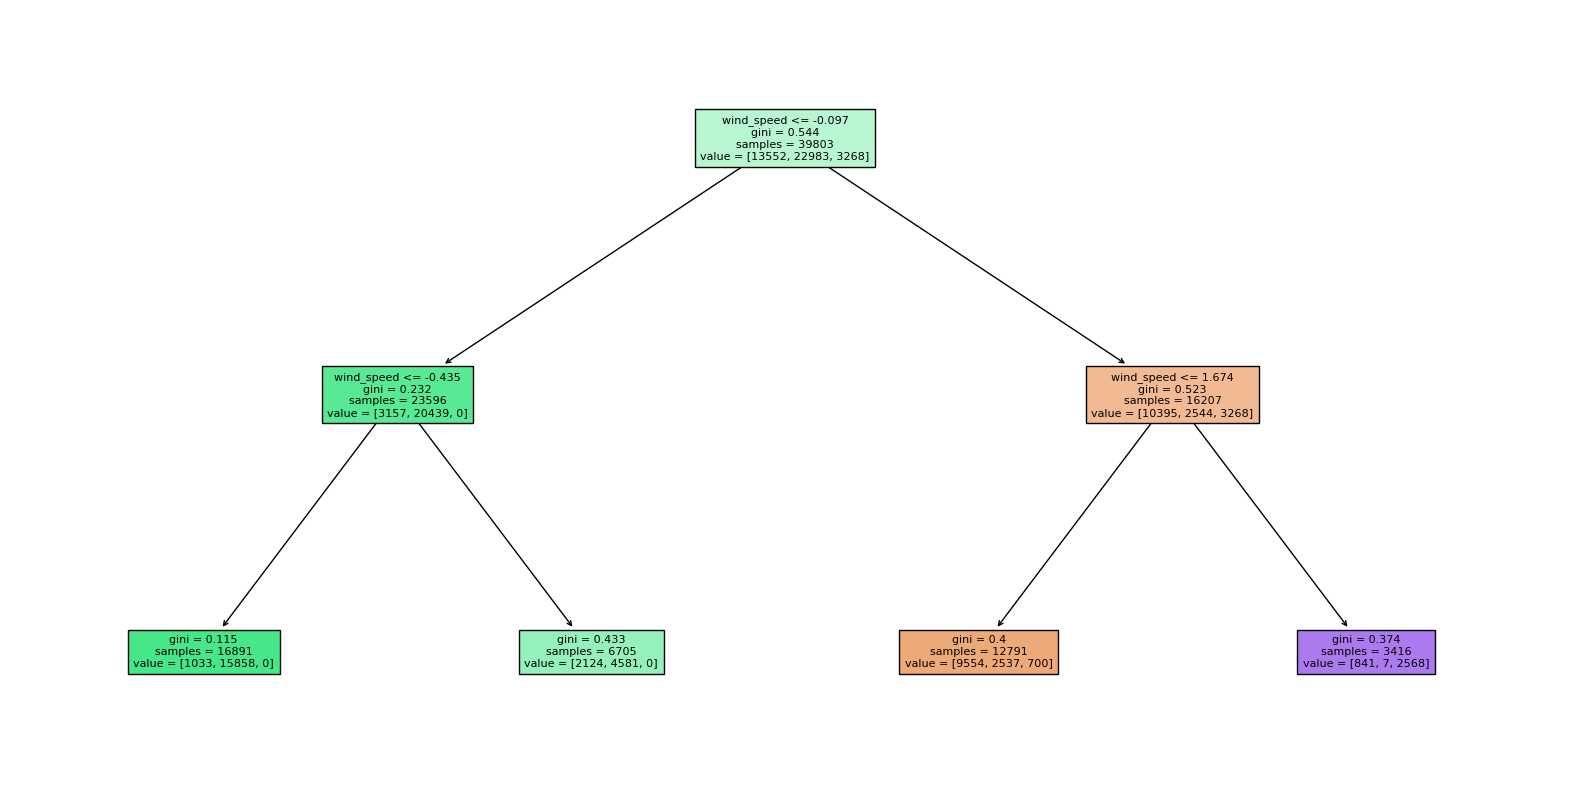

In [24]:
# show tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=features, filled=True, fontsize=8)

In [8]:
cond_lime2 = {
                1: {"wind_speed": -0.435}, 
                2: {"wind_speed":-0.097}, 
                3: {"wind_speed": 1.674}, 
                4: {"wind_speed": 5}
                }	


In [16]:
models = buildfunctions(X_train_df, y_trainxgb_df, cond_lime2)
p = predfunctiontree(X_test_df, models, cond_lime2)

In [17]:
eval_bins(p, y_testxgb, y_test)

Bin: [0, 9e-05]      RMSE: 0.673, Avg. Error: 0.008
Bin: [9e-05, 1]      RMSE: 1.580, Avg. Error: 0.043
Bin: [1, 10]         RMSE: 3.625, Avg. Error: 0.672
Bin: [10, 50]        RMSE: 6.223, Avg. Error: -0.626
Bin: [50, 100]       RMSE: 13.640, Avg. Error: -8.348
Total RSME 1.6287768351126168
Total Avg. Error 0.010825046331374873


[[[0, 9e-05],
  0.4528831993468669,
  0.6729659719085853,
  0.18482236272975747,
  0.007817730085153464],
 [[9e-05, 1],
  2.4959415881683635,
  1.5798549263044261,
  0.7255502320956475,
  0.04290746099058589],
 [[1, 10],
  13.143830574915093,
  3.6254421213025996,
  2.3828230119998848,
  0.671868836327888],
 [[10, 50],
  38.731496886173815,
  6.223463415669269,
  4.529592735996122,
  -0.6256631817015262],
 [[50, 100],
  186.04854189297419,
  13.639961213030416,
  10.473414197740354,
  -8.34808337878624]]

In [21]:
models_pwr = buildfunctions(X_train_pwr, y_trainxgb_df, cond_lime2, n=19, featlist=X_train_pwr.columns)
p = predfunctiontree(X_test_pwr, models_pwr, cond_lime2, n=19, featlist = X_train_pwr.columns)
eval_bins(p, y_testxgb, y_test)

Bin: [0, 9e-05]      RMSE: 0.416, Avg. Error: 0.009
Bin: [9e-05, 1]      RMSE: 0.806, Avg. Error: 0.106
Bin: [1, 10]         RMSE: 2.454, Avg. Error: 0.226
Bin: [10, 50]        RMSE: 5.680, Avg. Error: -0.671
Bin: [50, 100]       RMSE: 8.270, Avg. Error: -3.897
Total RSME 1.156540162250476
Total Avg. Error 0.010465666620518706


[[[0, 9e-05],
  0.1731333901542806,
  0.4160930066154448,
  0.13414900227445894,
  0.009331596506490108],
 [[9e-05, 1],
  0.6494402353455079,
  0.8058785487562675,
  0.39672906799454816,
  0.10591563346356056],
 [[1, 10],
  6.022354611943274,
  2.4540486164587842,
  1.2521947158832993,
  0.22620262554525897],
 [[10, 50],
  32.263412840119514,
  5.680089157761479,
  3.83726532898966,
  -0.6706298405586937],
 [[50, 100],
  68.39516459748702,
  8.270136915280606,
  5.730545622852569,
  -3.896990083662318]]

## LIME - k = 4

In [25]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(lime_df[lime_list[:7]])
X_train_df['cluster'] = kmeans.labels_

In [26]:
# build decision tree to predict cluster
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train_df[features], X_train_df['cluster'])

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'wind_speed <= -0.393\ngini = 0.642\nsamples = 39803\nvalue = [6376, 16847, 15518, 1062]'),
 Text(0.25, 0.5, 'track_distance <= 0.319\ngini = 0.356\nsamples = 17934\nvalue = [8, 13777, 4149, 0]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.496\nsamples = 4785\nvalue = [6, 2625, 2154, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.258\nsamples = 13149\nvalue = [2, 11152, 1995, 0]'),
 Text(0.75, 0.5, 'wind_speed <= 0.813\ngini = 0.623\nsamples = 21869\nvalue = [6368, 3070, 11369, 1062]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.451\nsamples = 14422\nvalue = [1210, 3036, 10175, 1]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.474\nsamples = 7447\nvalue = [5158, 34, 1194, 1061]')]

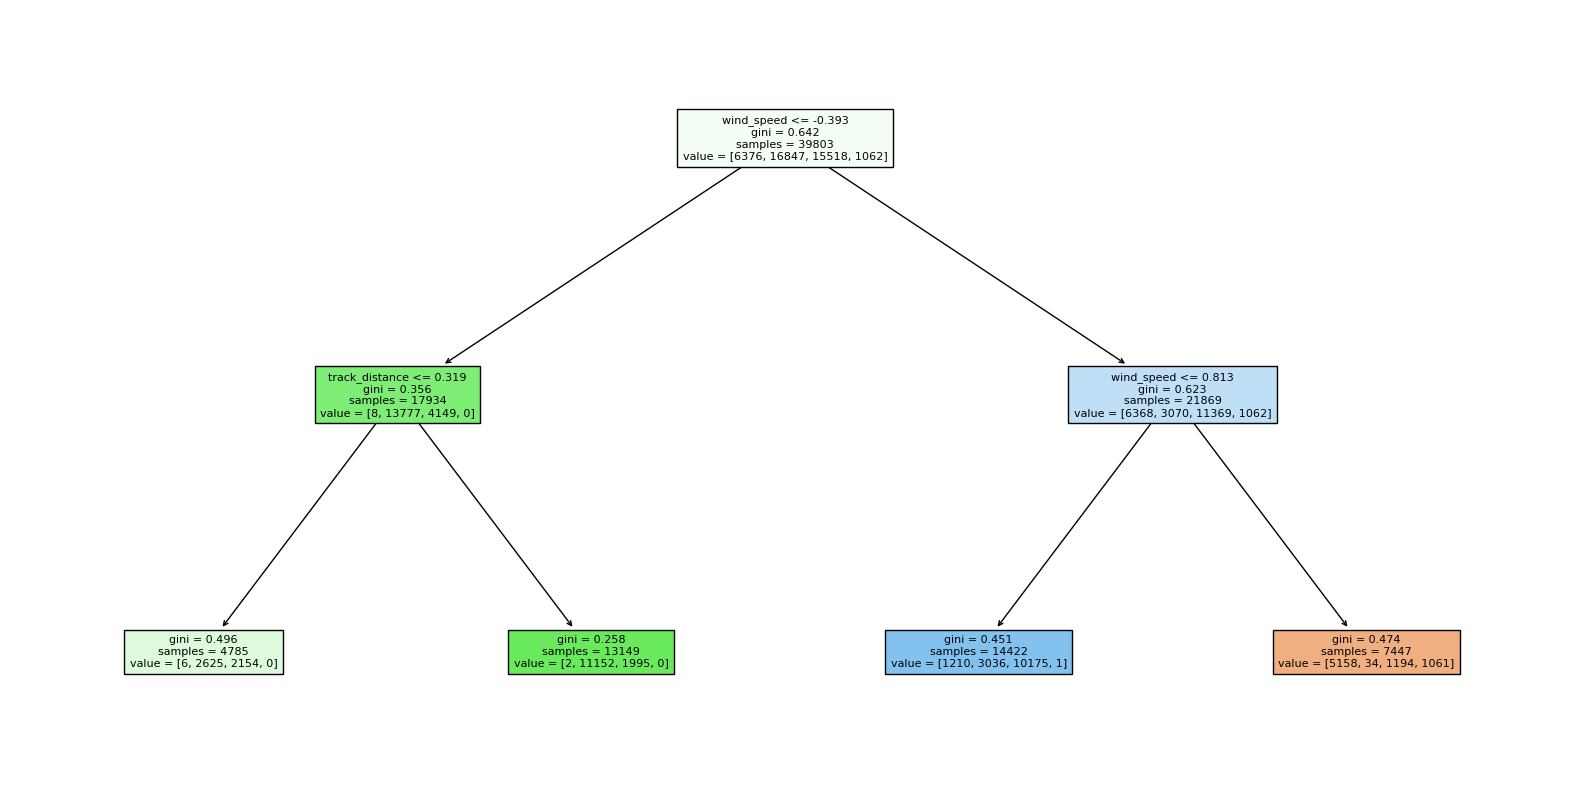

In [27]:
# show tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=features, filled=True, fontsize=8)

In [29]:
cond_lime3 = {
                1: {"wind_speed": -0.393, "track_distance": 0.319}, 
                2: {"wind_speed": -0.393, "track_distance": 5}, 
                3: {"wind_speed": 0.813, "track_distance": 5},
                4: {"wind_speed": 5, "track_distance": 5}
                }	

In [30]:
models = buildfunctions(X_train_df, y_trainxgb_df, cond_lime3)
p = predfunctiontree(X_test_df, models, cond_lime3)
eval_bins(p, y_testxgb, y_test)

Bin: [0, 9e-05]      RMSE: 1.004, Avg. Error: -0.042
Bin: [9e-05, 1]      RMSE: 2.029, Avg. Error: 0.341
Bin: [1, 10]         RMSE: 3.842, Avg. Error: 1.712
Bin: [10, 50]        RMSE: 8.689, Avg. Error: -2.544
Bin: [50, 100]       RMSE: 19.496, Avg. Error: -14.041
Total RSME 2.1574850724215366
Total Avg. Error 0.01630833870064978


[[[0, 9e-05],
  1.0085162872207527,
  1.0042491161164906,
  0.2810255025560224,
  -0.041976134742766055],
 [[9e-05, 1],
  4.115879393018511,
  2.0287630204187255,
  1.1248058614093603,
  0.34097770784270204],
 [[1, 10],
  14.760962181723082,
  3.841999763368431,
  2.8536844136129527,
  1.7122875915635336],
 [[10, 50],
  75.49751483929352,
  8.688930592385551,
  6.012495761199857,
  -2.543897683105306],
 [[50, 100],
  380.07830596365363,
  19.495597091744937,
  15.511357076848263,
  -14.04074954698017]]

In [31]:
models_pwr = buildfunctions(X_train_pwr, y_trainxgb_df, cond_lime3, n=19, featlist=X_train_pwr.columns)
p = predfunctiontree(X_test_pwr, models_pwr, cond_lime3, n=19, featlist = X_train_pwr.columns)
eval_bins(p, y_testxgb, y_test)

Bin: [0, 9e-05]      RMSE: 0.434, Avg. Error: 0.015
Bin: [9e-05, 1]      RMSE: 0.862, Avg. Error: 0.085
Bin: [1, 10]         RMSE: 2.468, Avg. Error: 0.301
Bin: [10, 50]        RMSE: 5.765, Avg. Error: -0.744
Bin: [50, 100]       RMSE: 8.266, Avg. Error: -3.933
Total RSME 1.176672737827392
Total Avg. Error 0.013913447083366774


[[[0, 9e-05],
  0.18828704019669423,
  0.43392054594901847,
  0.13957864671183132,
  0.014573639649297922],
 [[9e-05, 1],
  0.743453526165902,
  0.8622375114583579,
  0.4428475264849836,
  0.0851462516708927],
 [[1, 10],
  6.09203154945562,
  2.468204114220625,
  1.2701394066670404,
  0.3011796663570362],
 [[10, 50],
  33.23494403596444,
  5.7649756318621534,
  3.9169396894004285,
  -0.7442776665257491],
 [[50, 100],
  68.3342337802969,
  8.266452309201142,
  5.759519242971389,
  -3.932658353364198]]

## SHAP

In [120]:
import shap
X_train4shapely = pd.DataFrame(data=X_train, columns=features)
explainer = shap.Explainer(model, X_train4shapely)
shap_exp = explainer.shap_values(X_train)

 98%|===================| 38899/39803 [00:26<00:00]        

In [121]:
shap_exp_df = pd.DataFrame(shap_exp, columns=features)

In [122]:
for n in range(2,10):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(shap_exp_df)
    print(f"Silhouette Score n={n}: ", silhouette_score(shap_exp_df, kmeans.labels_))

Silhouette Score n=2:  0.9608536808472234
Silhouette Score n=3:  0.9087289987375615
Silhouette Score n=4:  0.8963033951943381
Silhouette Score n=5:  0.8010279490053483
Silhouette Score n=6:  0.7997205300443618
Silhouette Score n=7:  0.7958435865820764
Silhouette Score n=8:  0.7921678267748982
Silhouette Score n=9:  0.7692281238170898


In [123]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(lime_df[lime_list[:7]])
X_train_df['shap_cluster'] = kmeans.labels_

In [145]:
X_train_df["shap_cluster"].value_counts()

shap_cluster
1    16660
2    15539
0     6440
3     1164
Name: count, dtype: int64

In [124]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_df[features], X_train_df['shap_cluster'])

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'wind_speed <= -0.341\ngini = 0.645\nsamples = 39803\nvalue = [6440, 16660, 15539, 1164]'),
 Text(0.25, 0.625, 'track_distance <= 0.219\ngini = 0.383\nsamples = 19123\nvalue = [13, 14190, 4920, 0]'),
 Text(0.125, 0.375, 'wind_speed <= -0.661\ngini = 0.502\nsamples = 4803\nvalue = [10, 2396, 2397, 0]'),
 Text(0.0625, 0.125, 'gini = 0.422\nsamples = 1654\nvalue = [0, 1153, 501, 0]'),
 Text(0.1875, 0.125, 'gini = 0.482\nsamples = 3149\nvalue = [10, 1243, 1896, 0]'),
 Text(0.375, 0.375, 'wind_speed <= -0.665\ngini = 0.291\nsamples = 14320\nvalue = [3, 11794, 2523, 0]'),
 Text(0.3125, 0.125, 'gini = 0.202\nsamples = 9344\nvalue = [0, 8277, 1067, 0]'),
 Text(0.4375, 0.125, 'gini = 0.415\nsamples = 4976\nvalue = [3, 3517, 1456, 0]'),
 Text(0.75, 0.625, 'wind_speed <= 0.866\ngini = 0.622\nsamples = 20680\nvalue = [6427, 2470, 10619, 1164]'),
 Text(0.625, 0.375, 'wind_speed <= 0.395\ngini = 0.454\nsamples = 13529\nvalue = [1517, 2439, 9573, 0]'),
 Text(0.5625, 0.125, 'gini = 0

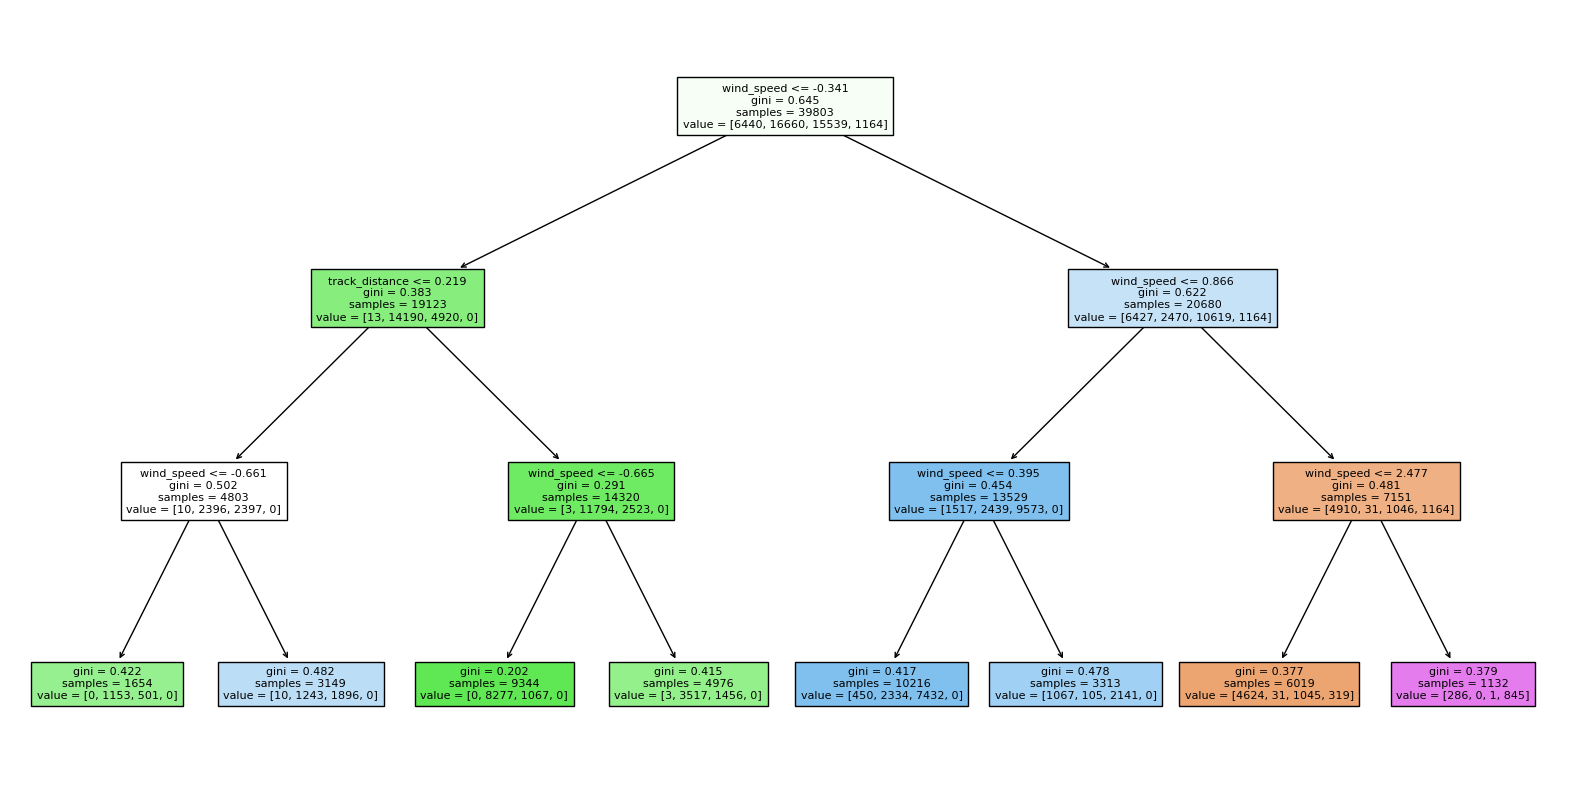

In [125]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=features, filled=True, fontsize=8)

In [159]:
# X_train subset with windspeed < 0

X_train_df[X_train_df["wind_speed"]<-.661]
X_test_df[X_test_df["wind_speed"]<-.665]

wind_speed  track_distance  total_houses  rainfall_max_6h  \
13     -1.021024       -0.554836     -0.272279        -0.666863   
20     -0.733495        1.332426     -0.268367        -1.247371   
23     -0.724343        1.207642     -0.256861        -0.952226   
24     -1.243664        0.635419     -0.034406        -1.015977   
26     -0.967071        1.712906     -0.261240        -1.002485   
...          ...             ...           ...              ...   
9937   -1.333963        1.052806      0.525059        -1.115146   
9942   -0.849589        0.259475     -0.078216        -0.140999   
9944   -0.698694        0.941246     -0.062058        -1.210267   
9946   -1.050857        1.124671     -0.175754         0.820668   
9947   -1.357214        1.431274      0.046389        -0.900281   

      rainfall_max_24h       rwi  mean_slope  std_slope  mean_tri   std_tri  \
13           -0.638171 -0.100972    2.243480   0.811657  2.228462  0.582121   
20           -1.346636 -0.831218    0.711696   0.737622  0.701491  0.640326   
23           -1.046523 -0.142177   -0.143171   0.175154 -0.065919  0.070244   
24           -1.117612  0.079008    1.106545   0.937143  1.127396  0.761618   
26           -1.067861 -0.185607    1.012864   0.492906  0.945174  0.377201   
...                ...       ...         ...        ...       ...       ...   
9937         -1.228061  0.910062    0.349567   0.561856  0.416314  0.553834   
9942          0.033809 -0.741993    0.552836   1.556816  0.580554  1.676101   
9944         -1.279969 -0.153034   -0.650799  -0.171668 -0.652598 -0.196791   
9946          1.179923 -0.185030    0.672710   1.226756  0.650708  1.197646   
9947         -0.993399  0.479891   -0.444384   0.191763 -0.381543  0.267485   

      mean_elev  coast_length  with_coast     urban     rural     water  \
13     2.325381     -0.657215   -1.069284 -0.731012  1.199144 -0.777261   
20     0.519744     -0.657215   -1.069284 -0.731012  1.199144 -0.777261   
23    -0.651530      2.623077    0.935205 -0.731012 -1.293885  1.729358   
24     0.233548     -0.657215   -1.069284  0.338248  0.575886 -0.777261   
26    -0.444530     -0.073471    0.935205 -0.731012 -1.362862  1.798711   
...         ...           ...         ...       ...       ...       ...   
9937  -0.202629      0.286406    0.935205  1.965384 -0.562235 -0.586540   
9942  -0.210427     -0.657215   -1.069284  0.245269  0.630083 -0.777261   
9944  -0.391512     -0.657215   -1.069284 -0.126648  0.846868 -0.777261   
9946   0.033110     -0.657215   -1.069284 -0.266117  0.928162 -0.777261   
9947  -0.438933      0.159366    0.935205  0.338248  0.494592 -0.695523   

      total_pop  percent_houses_damaged_5years  
13    -0.277832                      -0.200338  
20    -0.264773                      -0.241398  
23    -0.256166                      -0.141909  
24    -0.077151                      -0.241228  
26    -0.269314                      -0.237058  
...         ...                            ...  
9937   0.579691                      -0.241397  
9942  -0.041985                       0.269119  
9944  -0.033219                       0.953119  
9946  -0.139468                       0.990301  
9947  -0.055362                      -0.241398  

[2717 rows x 18 columns]

In [160]:
shapclass =     {1: {"wind_speed": -0.661, "track_distance": 0.219}, 
                2: {"wind_speed": -0.341, "track_distance": 0.219} , 
                3: {"wind_speed": -0.665, "track_distance": 5}, 
                4: {"wind_speed": -0.341, "track_distance": 5},
                5: {"wind_speed": 0.395, "track_distance": 5}, 
                6: {"wind_speed": 0.866, "track_distance": 5},
                7: {"wind_speed": 2.477, "track_distance": 5},
                8: {"wind_speed": 10, "track_distance": 5}
                }	

In [162]:
models = buildfunctions(X_train_df, y_trainxgb_df, shapclass)
p = predfunctiontree(X_test_df, models, shapclass)
y_test_df["FT_shapclass"]  = p

In [163]:
eval_bins(p, y_testxgb, y_test)

Bin: [0, 9e-05]      RMSE: 0.442, Avg. Error: 0.006
Bin: [9e-05, 1]      RMSE: 0.807, Avg. Error: 0.107
Bin: [1, 10]         RMSE: 2.660, Avg. Error: 0.185
Bin: [10, 50]        RMSE: 5.552, Avg. Error: -0.456
Bin: [50, 100]       RMSE: 9.613, Avg. Error: -4.619
Total RSME 1.2053045506539795
Total Avg. Error 0.007939926083805662


[[[0, 9e-05],
  0.19562158692383386,
  0.44229129193760286,
  0.12724858951134504,
  0.0060991520674959325],
 [[9e-05, 1],
  0.6508469032892431,
  0.8067508309814395,
  0.3834106920161629,
  0.10735317330977943],
 [[1, 10],
  7.077438009736856,
  2.6603454681181646,
  1.1995054849465805,
  0.18543336354695314],
 [[10, 50],
  30.828502570769235,
  5.552342079768612,
  3.797104339954329,
  -0.4562279748771977],
 [[50, 100],
  92.4112975329419,
  9.61307950310107,
  7.103169986612785,
  -4.618968291761505]]